![](https://ucb.catolica.edu.br/hubfs/SITE/logo__catolica--footer.svg)

## Novas Tecnologias

Professor: Remis Balaniuk, 2024

<b>O que será tratado nessa aula: </b>

A aula apresenta uma introdução à análise exploratória de dados (EDA), constituída por:

- visualização
- análise estatística de dados

<b>Por que fazer EDA?</b>

1- Ter uma melhor compreensão dos dados

2- Compreendendo, estabelecer padrões

3- Baseado nos padrões, propor hipóteses e confirmá-las (ou não)

Algumas vezes não é necessário criar modelos de mineração, a simples análise exploratória é suficiente para extrair as informações que buscamos.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn

from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler

# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos como np.NaN
pandas.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
#%matplotlib notebook - não funciona no Colab
# default - figuras estáticas
%matplotlib inline

# Tamanho padrão das figuras
figsize=(10,6)

# Configuração do número de linhas e colunas a serem apresentadas em listagens
pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_21165/584095742.py:25: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pandas.options.mode.use_inf_as_na = True


## Carga de dados e análise descritiva inicial

Vamos trabalhae com três bases diferentes nessa aula.

Lendo dados diretamente de um URL:

In [3]:
url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1717436517'
housing = pd.read_csv(url, sep=',')
housing.head()

RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  122659.350322   
1    394913         1     New York, NY        msa        NY  217008.362117   
2    753899         2  Los Angeles, CA        msa        CA  230633.417032   
3    394463         3      Chicago, IL        msa        IL  153976.495500   
4    394514         4       Dallas, TX        msa        TX  128441.069684   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31     2000-06-30  \
0  122875.147441  123142.767643  123716.760444  124377.357342  125085.606250   
1  217930.525215  218861.229206  220747.195629  222700.179171  224865.349314   
2  231491.665968  232634.845367  234909.388347  237397.025296  239867.240988   
3  154119.032880  154390.497831  155065.835165  155878.184747  156789.860766   
4  128498.277785  128564.044354  128734.833225  128960.013675  129187.942785   

      2000-07-31     2000-08-31     2000-09-30     2000-10-31     2000-11-30  \
0  125835.780568  126645.520739  127487.794273  128333.275795  129174.708547   
1  227230.851706  229750.241017  232328.557615  234900.196641  237393.432863   
2  242399.460678  244955.804845  247363.859714  249514.130813  251458.214683   
3  157760.217382  159129.425434  160737.198592  162589.293880  163994.292709   
4  129426.923339  129784.914235  130233.551212  130743.961401  131224.822051   

      2000-12-31     2001-01-31     2001-02-28     2001-03-31     2001-04-30  \
0  130017.277829  130790.708169  131475.666132  132136.318934  132850.631505   
1  239747.907046  241991.427921  244291.954997  246524.557597  248782.062437   
2  253403.544546  254820.562758  256362.597665  258114.674557  260690.707608   
3  165142.191488  165971.009166  166783.577362  167638.069197  168544.882018   
4  131687.024178  131922.519955  131729.379530  131445.559185  131285.747510   

      2001-05-31     2001-06-30     2001-07-31     2001-08-31  ...  \
0  133621.483915  134412.361925  135226.146445  136076.307852  ...   
1  251000.743512  253390.173268  255825.290278  258440.418608  ...   
2  263380.553171  265951.393409  268533.675232  271115.815499  ...   
3  169635.953937  170772.879784  171888.722775  173266.627308  ...   
4  131400.522660  131501.604698  131602.833162  131857.824746  ...   

      2022-04-30     2022-05-31     2022-06-30     2022-07-31     2022-08-31  \
0  336280.977353  341896.830910  346591.031911  349057.914287  349433.417286   
1  601299.814236  607989.032819  614109.048260  618003.640609  618727.815965   
2  917411.023585  929338.385471  936062.620483  937970.410109  934761.219452   
3  294676.740373  297912.284486  300098.279240  300628.838691  300007.356011   
4  370005.850563  378584.552483  385938.429645  389977.738407  390648.439227   

      2022-09-30     2022-10-31     2022-11-30     2022-12-31     2023-01-31  \
0  348151.351972  346918.514652  345906.291804  344986.955496  343782.142608   
1  616213.708923  613641.454883  611611.147685  610177.460442  609354.929551   
2  928851.587055  923357.048801  919449.677688  916188.797096  907533.872543   
3  298315.644653  296955.160478  296177.201894  295753.616079  295140.093106   
4  388928.634930  386842.877637  384907.687992  382893.847372  380298.966109   

      2023-02-28     2023-03-31     2023-04-30     2023-05-31     2023-06-30  \
0  342901.631210  342839.396798  343815.382792  345460.758464  347421.730528   
1  607992.637924  608309.285569  610325.204297  614371.588282  618558.047717   
2  896160.170541  885972.646570  883493.066250  887439.136355  895571.916830   
3  294985.313479  295635.719446  297342.491844  299553.170059  302136.906165   
4  377985.748036  376416.567590  375853.369203  376145.333812  376980.857845   

      2023-07-31     2023-08-31     2023-09-30     2023-10-31     2023-11-30  \
0  349190.673082  350832.176062  352072.339045  353000.359455  353657.789184   
1  622174.680744  625487.220773  628224.915278  630581.407730  6329



Dados sobre tumores (somente informações numéricas)

[http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer_data = cancer['data']
# 1 benigno, 0 maligno
cancer_target = cancer['target']
cancer_target_names  = cancer['target_names']
cancer_feature_names = cancer['feature_names']
cancer_data_DF = pd.DataFrame(cancer_data,columns=cancer_feature_names)
cancer_data_DF.head()


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
type(cancer)

sklearn.utils._bunch.Bunch

In [7]:
cancer_feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer_target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer_target_DF = pd.DataFrame(cancer_target,columns=['target'])

In [10]:
cancer_data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Dados sobre restaurantes:

In [11]:
# https://seaborn.pydata.org/generated/seaborn.load_dataset.html
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
# Estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers

cancer_data_DF.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.111500       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error  area error  smoothness error  compactness error  \
count       569.000000  569.000000        569.000000         569.000000   
mean          2.866059   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894              0.011796        0.020542   
std           0.030186              0.006170        0.008266   
min           0.000000              0.000000        0.007882   
25%           0.015090              0.007638        0.015160   
50%           0.025890              0.010930        0.018730   
75%           0.042050              0.014710        0.023480   
max           0.396000              0.052790        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               569.000000    569.000000     569.000000       569.000000   
mean                  0.003795     16.269190      25.677223       107.261213   
std                   0.002646      4.833242       6.146258        33.602542   
min                   0.000895      7.930000      12.020000        50.410000   
25%                   0.002248     13.010000      21.080000        84.110000   
50%                   0.003187     14.970000      25.410000        97.660000   
75%                   0.004558     18.790000      29.720000       125.400000   
max                   0.029840     36.040000      49.540000       251.200000   

        worst area  wor

In [14]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [15]:
tips[['sex','smoker','day','time']].describe()

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

### Contagem de valores

Pode ser feita em atributos numéricos e/ou categóricos. Faz mais sentido em atributos discretos.

In [16]:
cancer_data_DF['mean radius'].astype(int).value_counts()

mean radius
12    87
11    84
13    81
14    58
10    38
15    33
9     31
19    27
17    26
16    23
20    23
18    20
8     12
21     8
23     5
7      3
25     2
22     2
24     2
27     2
6      1
28     1
Name: count, dtype: int64

In [17]:
cancer_target_DF.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [18]:
type(cancer_target_DF)

pandas.core.frame.DataFrame

Mostrando as contagens de valores de forma gráfica:

<Axes: xlabel='target'>

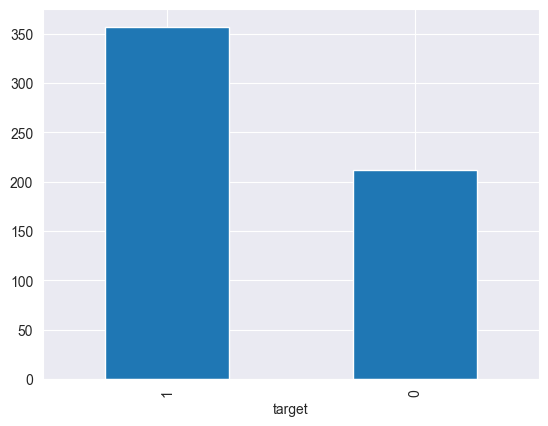

In [19]:
cancer_target_DF.target.value_counts().plot.bar()

In [12]:
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='day'>

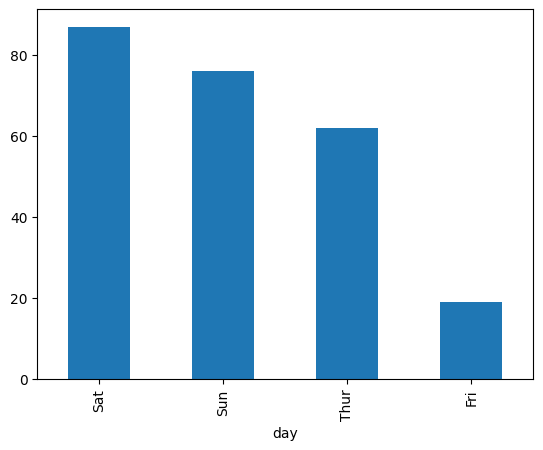

In [37]:
tips.day.value_counts().plot.bar()

## Exercício

Conte quantos registros da base housing existem por estado (StateName) e mostre graficamente.

<Axes: xlabel='StateName'>

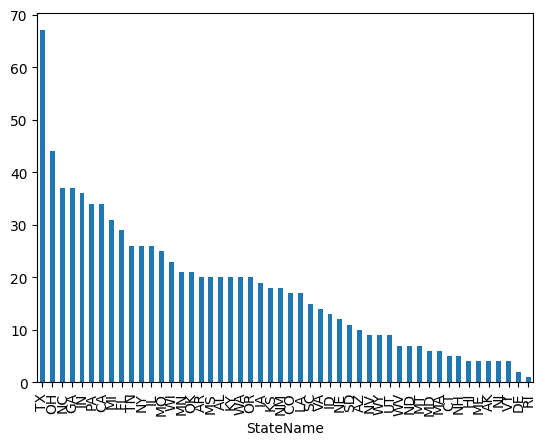

In [43]:
housing.StateName.value_counts().plot.bar()

### Contagem de dados ausentes

In [13]:
cancer_data_DF.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [14]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
housing.isnull().sum()

Conta missing values do dataframe todo:

In [45]:
housing.isnull().sum().sum(0)

49267

In [ ]:
# mostra só linhas contendo missing values
housing[housing.isnull().any(axis=1)]

## Limpeza dos dados faltantes:

Quando a base de dados contém posições sem dados é preciso corrigir esse problema para viabilizar as análises subsequentes.

Opções:

1. Retirar linhas com dados faltantes

2. Retirar colunas com dados faltantes

2. Preencher dados faltantes com algum valor

3. Combinar as três opções acima

Opção 1:

In [47]:
#cria uma cópia do dataframe só com linhas sem dados faltantes
housingLimpa = housing.dropna()

In [ ]:
housingLimpa.isnull().sum()

In [48]:
# verificando quantas linhas sobraram
print("antes:",len(housing),"depois:",len(housingLimpa))

antes: 895 depois: 300


Opção 2:

Vamos calcular a proporção de dados faltantes por coluna:

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 297 entries, RegionID to 2024-04-30
dtypes: float64(292), int64(2), object(3)
memory usage: 2.0+ MB


In [56]:
proporcaoDadosFaltantes = (housing.isnull().sum()/len(housing))

In [57]:
proporcaoDadosFaltantes.describe()

count    297.000000
mean       0.185343
std        0.198822
min        0.000000
25%        0.001117
50%        0.068156
75%        0.403352
max        0.518436
dtype: float64

In [ ]:
proporcaoDadosFaltantes.sort_values(ascending = False)

Se retirarmos todas as colunas com dados faltantes:

In [59]:
housing.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
       '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30'],
      dtype='object', length=297)

In [ ]:
# filtro de colunas sem dados faltantes
proporcaoDadosFaltantes == 0

In [66]:
# contando quantas colunas sobrariam
sum(proporcaoDadosFaltantes == 0)

56

In [61]:
# aplicando o filtro para ver quais colunas restariam
housing.columns[proporcaoDadosFaltantes == 0]

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
       '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-10-31', '2022-11-30', '2022-12-31',
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
       '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
       '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
       '2024-04-30'],
      dtype='object')

In [62]:
# criando um novo dataframe só com as colunas sem dados faltantes
housingLimpa2 = housingLimpa[housing.columns[proporcaoDadosFaltantes == 0]]

In [ ]:
housingLimpa2.isnull().sum()

## Opção 3 : Imputação - Preenchendo dados faltantes

Na imputação iremos preencher as posições do dataframe com dado faltante com algum valor escolhido. Nesse caso temos duas opções: escolher um valor único para colocar em todas as posições vazias, ou usar alguma medida estatística.

Opção 3.1: preenchendo as posições vazias com um valor escolhido

In [ ]:
# filtro com as posições vazias
housing.isnull()

In [69]:
# criando um novo dataframe preenchendo as posições vazias com 0 (poderia ser qualquer outro valor)
housingLimpa3 = housing.fillna(0)

In [ ]:
housingLimpa3.isnull().sum()

In [ ]:
# note que o dataframe original não foi alterado. É possível realizar a substituição no próprio dataframe com o parâmetro inplace = True
housing.isnull().sum()

Opção 3.2.

O problema é que preenchimento de dados faltantes com um valor específico pode inserir viéses nos dados, prejudicando análises subsequentes. Note que no caso da base housing, a falta dos valores não significa que o valor de compra das casas era 0, e sim que não havia informação para aquele período naquela região. Uma forma de contornar esses viéses é substituir esses dados pela média dos valores da coluna. No exemplo a seguir fazer a imputação mas criando novas colunas com os valores preenchidos.

In [81]:
housing.head()

RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  122659.350322   
1    394913         1     New York, NY        msa        NY  217008.362117   
2    753899         2  Los Angeles, CA        msa        CA  230633.417032   
3    394463         3      Chicago, IL        msa        IL  153976.495500   
4    394514         4       Dallas, TX        msa        TX  128441.069684   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31     2000-06-30  \
0  122875.147441  123142.767643  123716.760444  124377.357342  125085.606250   
1  217930.525215  218861.229206  220747.195629  222700.179171  224865.349314   
2  231491.665968  232634.845367  234909.388347  237397.025296  239867.240988   
3  154119.032880  154390.497831  155065.835165  155878.184747  156789.860766   
4  128498.277785  128564.044354  128734.833225  128960.013675  129187.942785   

      2000-07-31     2000-08-31     2000-09-30     2000-10-31     2000-11-30  \
0  125835.780568  126645.520739  127487.794273  128333.275795  129174.708547   
1  227230.851706  229750.241017  232328.557615  234900.196641  237393.432863   
2  242399.460678  244955.804845  247363.859714  249514.130813  251458.214683   
3  157760.217382  159129.425434  160737.198592  162589.293880  163994.292709   
4  129426.923339  129784.914235  130233.551212  130743.961401  131224.822051   

      2000-12-31     2001-01-31     2001-02-28     2001-03-31     2001-04-30  \
0  130017.277829  130790.708169  131475.666132  132136.318934  132850.631505   
1  239747.907046  241991.427921  244291.954997  246524.557597  248782.062437   
2  253403.544546  254820.562758  256362.597665  258114.674557  260690.707608   
3  165142.191488  165971.009166  166783.577362  167638.069197  168544.882018   
4  131687.024178  131922.519955  131729.379530  131445.559185  131285.747510   

      2001-05-31     2001-06-30     2001-07-31     2001-08-31  ...  \
0  133621.483915  134412.361925  135226.146445  136076.307852  ...   
1  251000.743512  253390.173268  255825.290278  258440.418608  ...   
2  263380.553171  265951.393409  268533.675232  271115.815499  ...   
3  169635.953937  170772.879784  171888.722775  173266.627308  ...   
4  131400.522660  131501.604698  131602.833162  131857.824746  ...   

      2022-04-30     2022-05-31     2022-06-30     2022-07-31     2022-08-31  \
0  336280.977353  341896.830910  346591.031911  349057.914287  349433.417286   
1  601299.814236  607989.032819  614109.048260  618003.640609  618727.815965   
2  917411.023585  929338.385471  936062.620483  937970.410109  934761.219452   
3  294676.740373  297912.284486  300098.279240  300628.838691  300007.356011   
4  370005.850563  378584.552483  385938.429645  389977.738407  390648.439227   

      2022-09-30     2022-10-31     2022-11-30     2022-12-31     2023-01-31  \
0  348151.351972  346918.514652  345906.291804  344986.955496  343782.142608   
1  616213.708923  613641.454883  611611.147685  610177.460442  609354.929551   
2  928851.587055  923357.048801  919449.677688  916188.797096  907533.872543   
3  298315.644653  296955.160478  296177.201894  295753.616079  295140.093106   
4  388928.634930  386842.877637  384907.687992  382893.847372  380298.966109   

      2023-02-28     2023-03-31     2023-04-30     2023-05-31     2023-06-30  \
0  342901.631210  342839.396798  343815.382792  345460.758464  347421.730528   
1  607992.637924  608309.285569  610325.204297  614371.588282  618558.047717   
2  896160.170541  885972.646570  883493.066250  887439.136355  895571.916830   
3  294985.313479  295635.719446  297342.491844  299553.170059  302136.906165   
4  377985.748036  376416.567590  375853.369203  376145.333812  376980.857845   

      2023-07-31     2023-08-31     2023-09-30     2023-10-31     2023-11-30  \
0  349190.673082  350832.176062  352072.339045  353000.359455  353657.789184   
1  622174.680744  625487.220773  628224.915278  630581.407730  6329

Para aplicar a média precisamos selecionar as colunas numéricas

In [82]:
# selecionando colunas numéricas do dataframe
housing.select_dtypes(include=np.number).columns

Index(['RegionID', 'SizeRank', '2000-01-31', '2000-02-29', '2000-03-31',
       '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
       ...
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
       '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30'],
      dtype='object', length=294)

Mas as colunas RegionID e SizeRank não são realmente nuyméricas. RegionID é um código, logo é categórica. SizeRank é um ordinal. Logo elas não podem ser tratadas como numéricas.

In [83]:
# selecionando as colunas realmente numéricas
colunasNumericas = housing.select_dtypes(include=np.number).columns[2:]
colunasNumericas

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
       '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30'],
      dtype='object', length=292)

In [ ]:
# obtendo as médias das colunas numéricas
medias = housing[colunasNumericas].mean()
medias

In [94]:
# preenchendo os valores faltantes das colunas numéricas com as médias
housingLimpa4 = housing.fillna(medias)

In [ ]:
housingLimpa4.isnull().sum()

Note que ainda sobrou um dado faltante na coluna StateName, que é categórica. Podemos substituir pela moda, que é o valor mais frequente.

In [106]:
# filtro das colunas não numéricas
filtroColNN = ~housing.columns.isin(colunasNumericas)

In [107]:
# seleciona as colunas não numéricas
colunasNaoNumericas = housing.columns[filtroColNN]

In [108]:
colunasNaoNumericas

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], dtype='object')

In [112]:
housing['StateName'].mode()

0    TX
Name: StateName, dtype: object

In [119]:
# obtem as modas das colunas categóricas (quando uma coluna tem empate na moda a função mode retorna todos os valores, por isso vamos pegar só o primeiro)
modas = housing[colunasNaoNumericas].mode()
modas = modas.loc[0]

In [120]:
modas

RegionID            102001
SizeRank             255.0
RegionName    Aberdeen, SD
RegionType             msa
StateName               TX
Name: 0, dtype: object

In [122]:
housingLimpa4 = housingLimpa4.fillna(modas)

In [ ]:
housingLimpa4.isnull().sum()

Opção 4: Combinando as opções anteriores

Note que algumas colunas tinham muitos dados faltantes (acima de 50%), e nesse caso pode não fazer sentido preencher com a média dos valores. Uma opção seria retirar as colunas com muitos dados faltantes e então preencher as demais com médias ou modas.

# Visualização de dados

## Visualização usando Matplotlib ou Seaborn?

Matplotlib é uma biblioteca de visualização de dados multiplataforma construída em arrays NumPy e projetada para funcionar com a biblioteca SciPy. O Matplotlib é a biblioteca mais usada para plotagem. Rápida e fácil de usar. Produz gráficos simples rapidamente e permite a criação de gráficos sofisticados.

https://matplotlib.org/

https://matplotlib.org/tutorials/introductory/sample_plots.html

Um dos recursos mais importantes do Matplotlib é sua capacidade de funcionar bem com muitos sistemas operacionais e back-ends gráficos. O Matplotlib suporta dezenas de back-ends e tipos de saída, o que significa que você pode contar com ele para funcionar independentemente do sistema operacional que estiver usando ou do formato de saída que desejar. Essa abordagem de plataforma cruzada de tudo para todos tem sido um dos grandes pontos fortes do Matplotlib. Isso levou a uma grande base de usuários, o que por sua vez levou a uma base de desenvolvedores ativa e às ferramentas poderosas do Matplotlib e onipresença no mundo científico do Python.

Seaborn é uma biblioteca baseada na Matplotlib, com recusrsos visuais mais sofisticados, principalmente para análise estatística.

https://seaborn.pydata.org/

https://seaborn.pydata.org/tutorial.html#tutorial

Usaremos ambas.

## Visualização Básica

O mínimo necessário para o desenho de gráficos

https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html


In [21]:
# Dados para plotagem
x = np.linspace(0, 10, 100)
x_ = np.linspace(0, 10, 10)

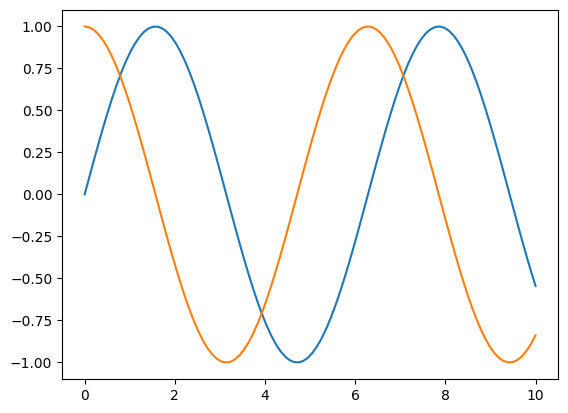

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))


##Salvando Figuras em Arquivo

Um recurso interessante do Matplotlib é a capacidade de salvar figuras em uma ampla variedade de formatos. Você pode salvar uma figura usando o comando savefig (). Por exemplo, para salvar a figura anterior como um arquivo PNG, você pode executar isto:

In [23]:
fig.savefig('senoEcosseno.png')

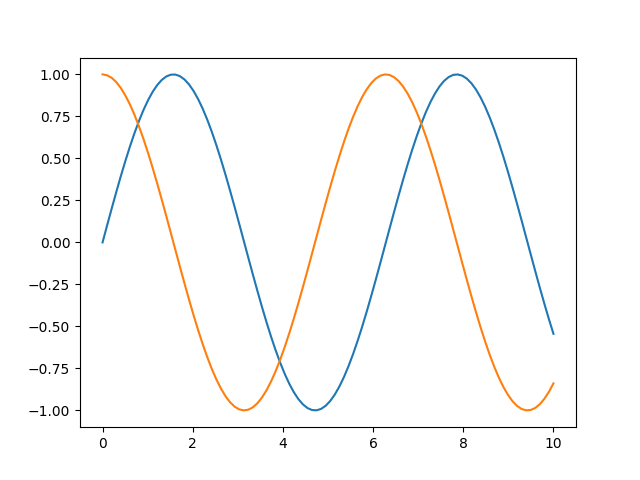

In [24]:
from IPython.display import Image
Image('senoEcosseno.png')

Em savefig (), o formato do arquivo é inferido a partir da extensão do nome de arquivo fornecido. Dependendo de quais back-ends você instalou, muitos formatos de arquivo diferentes estão disponíveis. Você pode encontrar a lista de tipos de arquivo suportados para seu sistema usando o seguinte método do objeto de tela de figura:

In [25]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

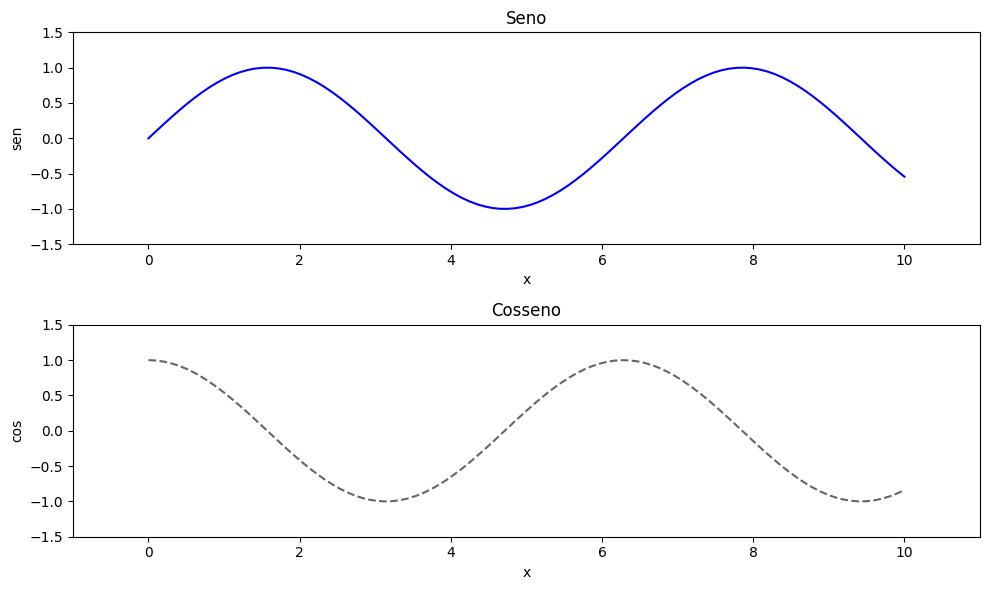

In [26]:

import matplotlib.pyplot as plt

##### FORMA 1 -  Estilo MATLAB: Cria figura com múltiplas imagens sem trabalhar com eixos
fig = plt.figure(figsize=figsize)  # cria uma figura (que poderá ser salva depois)

# Cria o primeiro de dois painéis
plt.subplot(2, 1, 1) # (linhas, colunas, qual painel)

# Linha colorida
plt.plot(x, np.sin(x), color='blue', linestyle='-', label='sin(x)')
# Títulos
plt.title('Seno')
plt.xlabel('x')
plt.ylabel('sen')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

# cria o segundo painel
plt.subplot(2, 1, 2)

# Linha tracejada
plt.plot(x, np.cos(x), color='0.4', linestyle='--', label='cos(x)')
plt.title('Cosseno')
plt.xlabel('x')
plt.ylabel('cos')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.tight_layout()
# plt.axis('tight')

#plt.show() # não é necessário no IPython notebook - num script externo cria uma janela

# note que nessa sintaxe a ordem das declarações plot define em qual posição o resultado vai aparecer



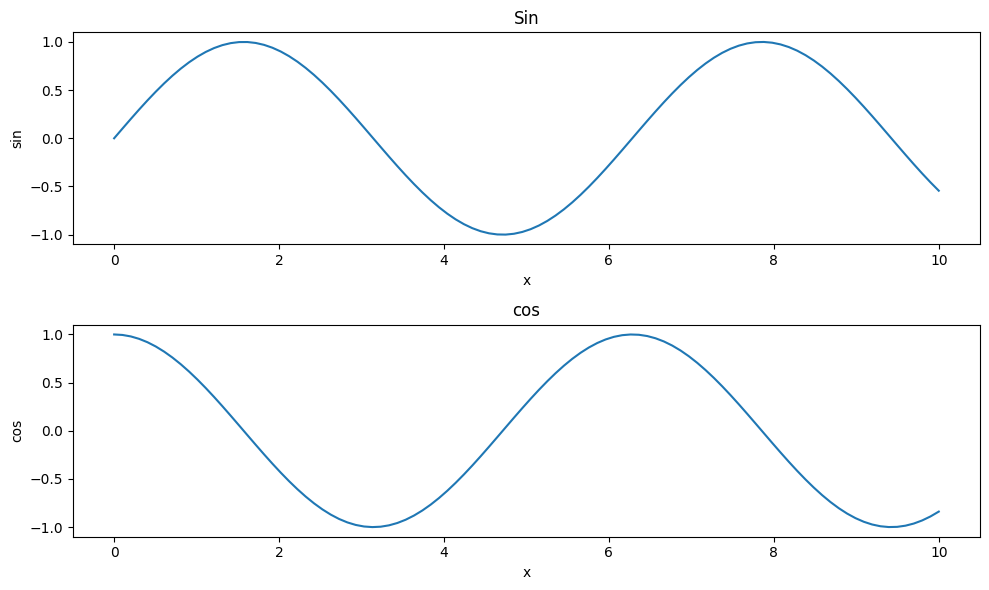

In [27]:
##### FORMA 2 -  Estilo orientado a objetos: Cria figura com múltiplas imagens trabalhando com eixos
fig, ax = plt.subplots(2, 1, figsize=figsize) # ax vai ser um array de dois objetos

ax[0].plot(x, np.sin(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('sin')
ax[0].set_title('Sin')

ax[1].plot(x, np.cos(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('cos')
ax[1].set_title('cos')

plt.tight_layout()
plt.show()

# note que nessa sintaxe a posição na figura é definida pela posição no array de objetos



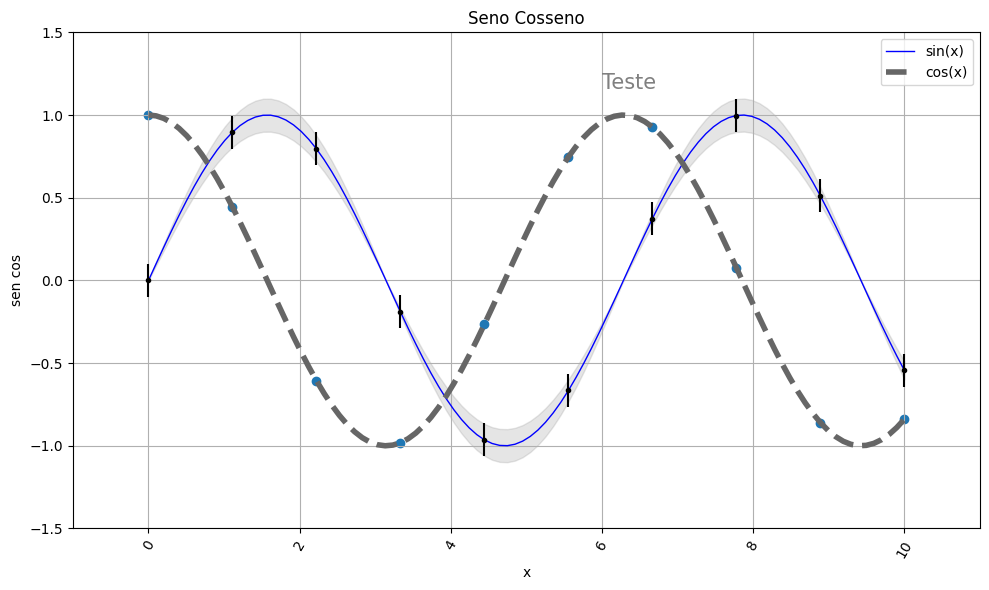

In [28]:
##### FORMA 3 -  Cria figura única com múltiplos plots
fig = plt.figure(figsize=figsize)
ax = plt.axes()

plt.plot(x, np.sin(x), color='blue', linestyle='-', label='sin(x)', linewidth=1)
plt.errorbar(x_, np.sin(x_), yerr=0.1, fmt='.k')
plt.fill_between(x, 1.1*np.sin(x), 0.9*np.sin(x), color='gray', alpha=0.2)

# note que x e x_ têm passos diferentes mas o plot consegue compatibilizar
plt.plot(x, np.cos(x), color='0.4', linestyle='--', label='cos(x)', linewidth=4)
plt.scatter(x_, np.cos(x_), marker='o')

# Limites de plotagem
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

# Títulos
plt.title('Seno Cosseno')
plt.xlabel('x')
plt.ylabel('sen cos')

# Anotações
style = dict(size=15, color='gray')
plt.text(6, np.cos(6)+0.2, "Teste", **style)


# Torna legenda visívil
plt.legend()

# Grid
plt.grid(True)

# Rotaciona labels
plt.xticks(rotation=60)

plt.tight_layout()
#plt.show()



No Matplotlib, a figura (uma instância da classe plt.Figure) pode ser pensada como um único contêiner que contém todos os objetos que representam eixos, gráficos, texto e rótulos. Os eixos (uma instância da classe plt.Axes) é o que vemos acima: uma caixa delimitadora com marcas e rótulos, que eventualmente conterá os elementos do gráfico que compõem nossa visualização.

## Ajustando o gráfico: cores e estilos de linha

O primeiro ajuste que você pode desejar fazer em um gráfico é controlar as cores e estilos de linha. A função plt.plot () recebe argumentos adicionais que podem ser usados ​​para especificá-los. Para ajustar a cor, você pode usar a palavra-chave color, que aceita um argumento string que representa virtualmente qualquer cor imaginável. A cor pode ser especificada de várias maneiras:

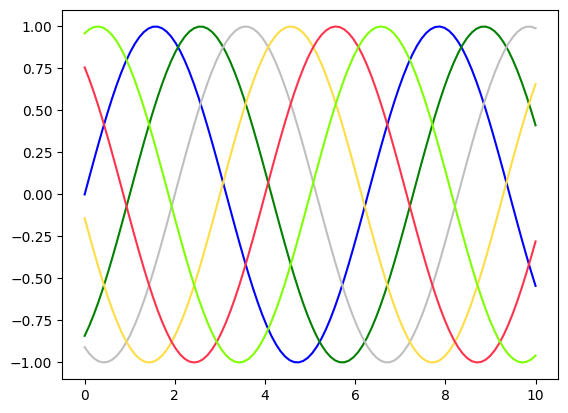

In [29]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Se nenhuma cor for especificada, o Matplotlib percorrerá automaticamente um conjunto de cores padrão para várias linhas.

Da mesma forma, você pode ajustar o estilo da linha usando a palavra-chave linestyle:

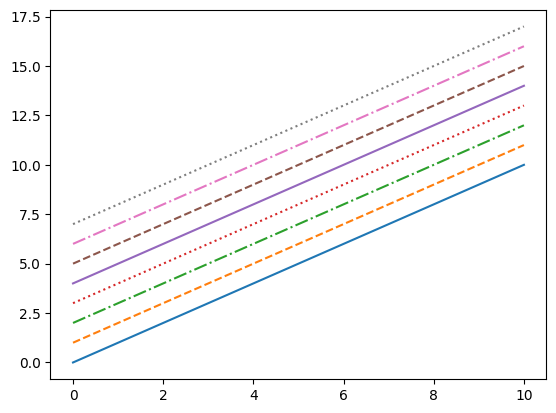

In [30]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Resumindo, você pode usar os seguintes códigos:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Se você quiser ser extremamente conciso, esses códigos de estilo de linha e cores podem ser combinados em um único argumento não-palavra-chave para a função plt.plot ():

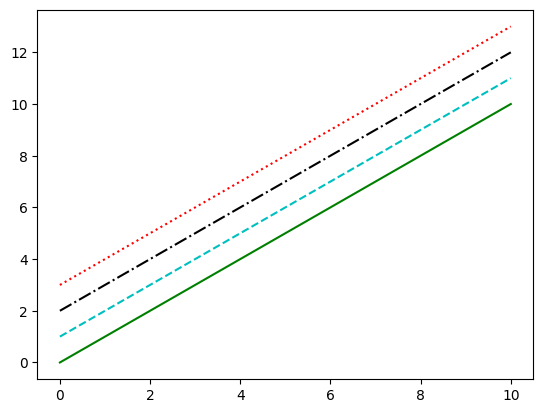

In [31]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

# Visualização para análise de dados

## Gráficos de dispersão simples

Outro tipo de gráfico comumente usado é o gráfico de dispersão simples, um primo próximo do gráfico de linha. Em vez de pontos serem unidos por segmentos de linha, aqui os pontos são representados individualmente com um ponto, círculo ou outra forma.

## Plotar variável X índice

Pode trazer informações interessantes de tendência se plotarmos variável X índice, mesmo que não trabalhemos com séries temporais.

No mínimo verificaremos se os dados foram embaralhados

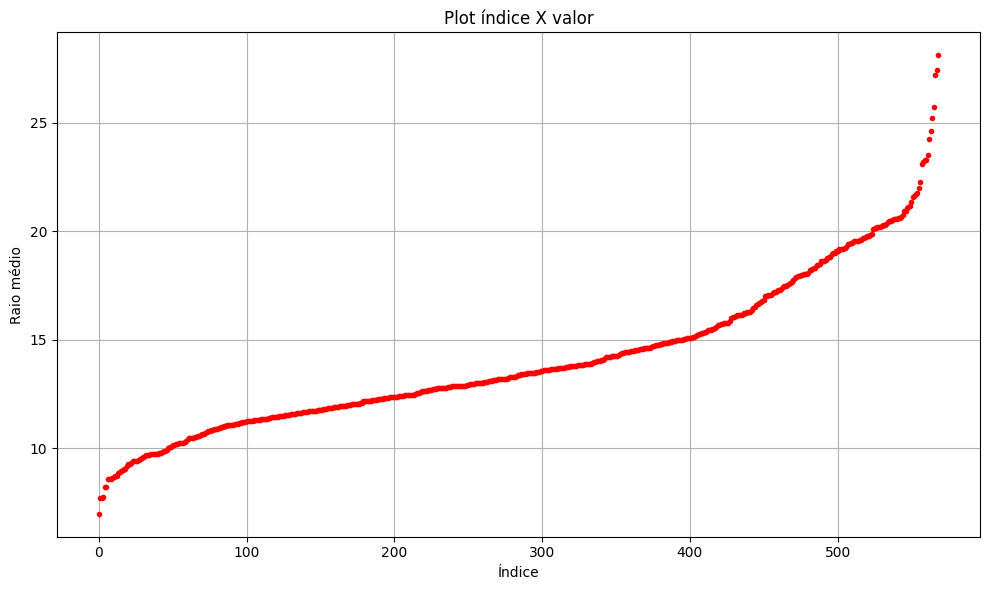

In [32]:
plt.subplots(figsize=figsize)
plt.plot(range(len(cancer_data_DF)),
         cancer_data_DF['mean radius'].sort_values(),
         'r.'
         )
plt.xlabel('Índice')
plt.ylabel('Raio médio')
plt.title('Plot índice X valor')
plt.grid(True)
plt.tight_layout()

## EXERCÍCIO: Plotar variável X índice

- Para tips plotar as variáveis total_bill e tip  X índice num mesmo gráfico, indicando a variável pela cor. Adicione legendas.

- Para o câncer, plotar a área média ordenada indicando pela cor se era maligno ou benigno.



## Plotar variável X variável

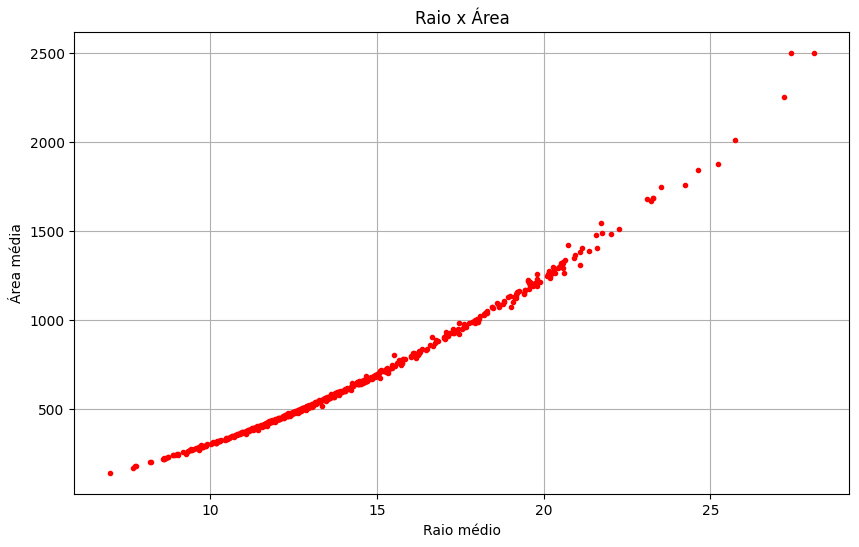

<Figure size 640x480 with 0 Axes>

In [33]:
plt.subplots(figsize=figsize)

cd_ = cancer_data_DF.loc[:,['mean radius','mean area']].values
colormap = ['r','b']
plt.plot(cd_[:,0],
         cd_[:,1],
         'r.'
         )

plt.xlabel('Raio médio')
plt.ylabel('Área média')
plt.title('Raio x Área')
plt.grid(True)
plt.show()
plt.tight_layout()

Usando o método scatter() e combinando duas variáveis mais um dado categórico para a escolha da cor.

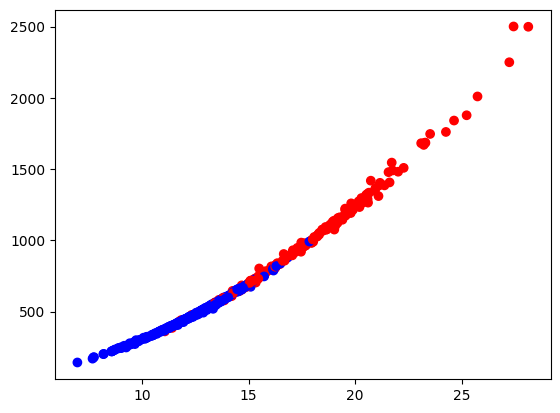

In [34]:
fig, ax = plt.subplots()

colors = ['red','blue']

ax.scatter(cd_[:,0],cd_[:,1], c=cancer_target_DF.target.apply(lambda x: colors[x]))

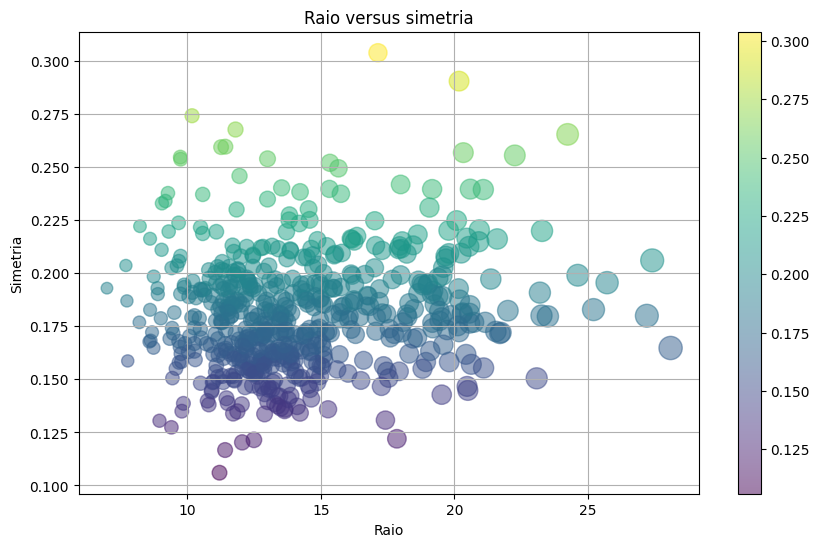

In [35]:
fig = plt.figure(figsize=figsize)

cd_ = cancer_data_DF[['mean radius','mean symmetry']].values

# definindo a cor e o tamanho usando variáveis (alpha define o contraste)
plt.scatter(cd_[:,0], cd_[:,1], c=cd_[:,1], s=cd_[:,0]*10, alpha=0.5,
                   cmap='viridis')
plt.colorbar()
plt.xlabel('Raio')
plt.ylabel('Simetria')
plt.title('Raio versus simetria')
plt.grid(True)
plt.show()

Usando o jonplot da biblioteca Seaborn:

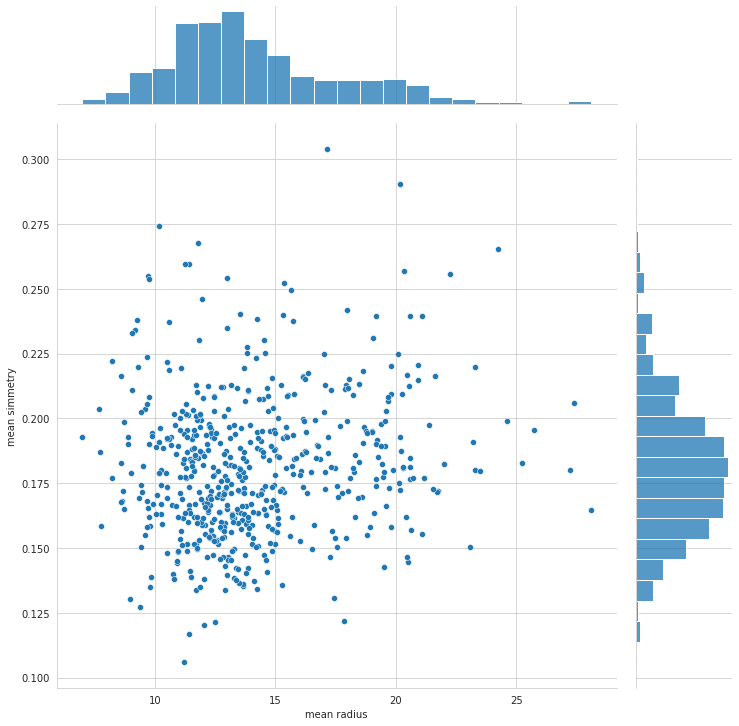

In [ ]:
cd_ = cancer_data_DF[['mean radius','mean symmetry']].values

# joinplot é limitado em argumentos, preferencialmente usar scatter plot
# há, porém, a vantagem de apresentar as distribuições das variáveis em análise

with sns.axes_style("whitegrid"):
    g = sns.jointplot(x=cd_[:,0], y=cd_[:,1], height=figsize[0])
    g.set_axis_labels('mean radius','mean simmetry')


# EXERCÍCIO: Plotar variável X variável

Para tips, plotar tip X bill. Fazer joinplot com mesmas variáveis. Fazer scatter com as mesmas variáveis, ajustando tamanho e cor por tip.

Para cancer_data, plotar mean radius X mean compactness, ajustando tamanho e cor por target

## Plotagem de variáveis categóricas

Um gráfico bastante útil para plotarmos a distribuição de valores de uma variável categórica é o gráfico de pizza. Podemos fazer isso com o pandas:

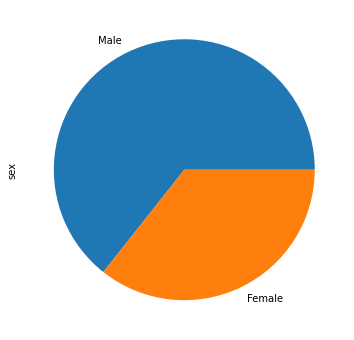

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.sex.value_counts().plot(kind='pie', ax=ax)

Nesse exemplo usamos o próprio Matplotlib:

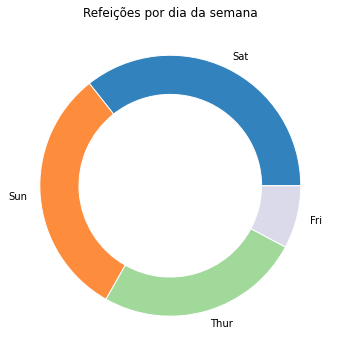

In [ ]:
fig, ax = plt.subplots(figsize = figsize)

size = 0.3

day_counts = tips.day.value_counts()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(day_counts))*5)

ax.pie(
    day_counts,
    radius=1,
    colors=outer_colors,
    labels = day_counts.index.values,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Refeições por dia da semana')
plt.show()

Outro tipo de gráfico comum para representar distribuição de valores categóricos é o gráfico de barras:

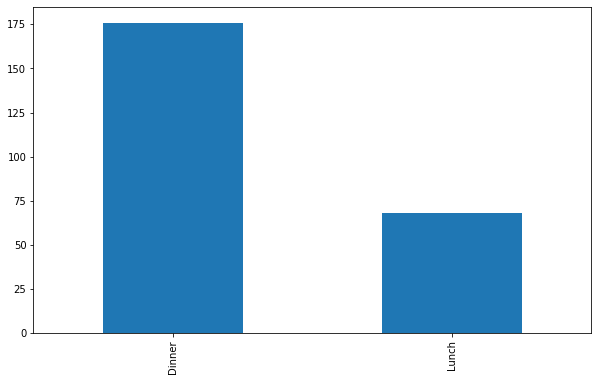

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
tips.time.value_counts().plot(kind='bar', ax=ax)

Nesse próximo exemplo mostramos como combinar duas variáveis categóricas (dia da semana e sexo), com uma variável numérica (total da conta).

O valor no eixo y é estimado a partir da variável numérica. Por default é utilizada a média, embora seja possível alterar usando o parâmetro 'estimator'. Em cada barra é ainda plotado um intervalo de confiança, que por default é o desvio padrão mas pode ser alterado usando parâmetro 'ci' passando um número real entre 0 e 100.


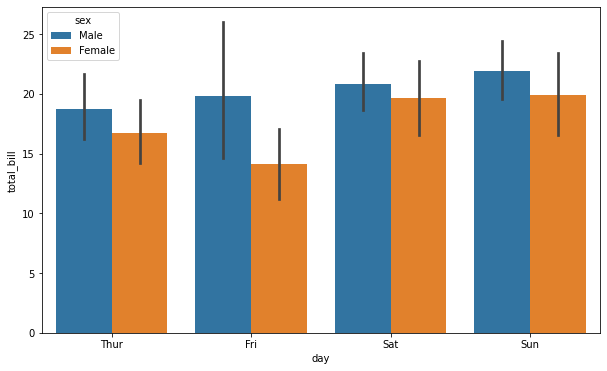

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ax=ax)

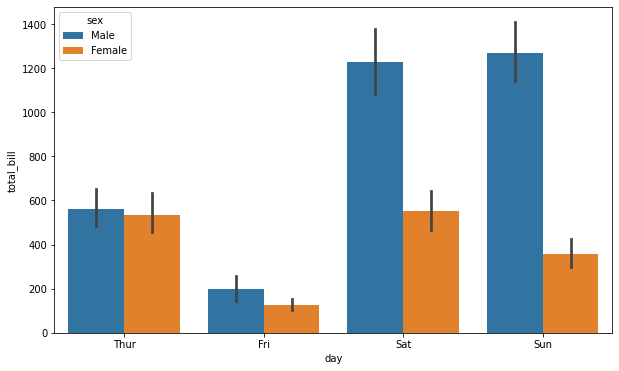

In [ ]:
# soma do total gasto por dia da semana com intervalo de confiança de 95%
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, ax=ax, estimator = sum, ci = 95)

## Gráficos de área

São úteis para mostrar a proporção entre valores complementares numa série. Normalmente são mostrados empilhados (o topo do gráfico corresponde à soma dos valores das variáveis mostradas).

In [ ]:
tips.groupby(['day']).sum()

total_bill     tip  size
day                           
Thur     1096.33  171.83   152
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216

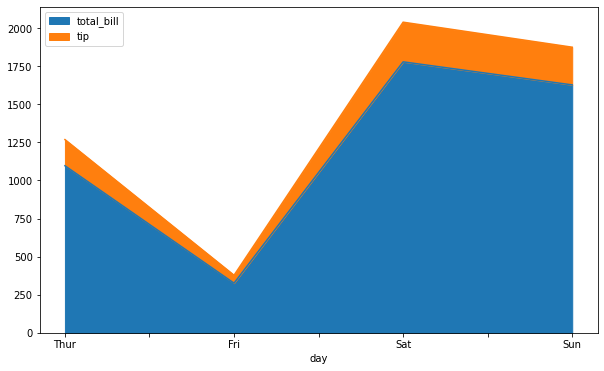

In [ ]:
tipspordia = tips.groupby(['day']).sum()
ax = tipspordia[['total_bill','tip']].plot.area(figsize=figsize)

# EXERCÍCIO: Plotagem de variáveis categóricas

Para tips plotar, na mesma figura, gráficos de barras horizontais, barras verticais, pizza e área para total da conta por smoker, day, sex e time

## Mosaico

Permite visualizar dados categóricos multivariados de forma rigorosa e informativa.Normalmente é criado para mostrar proporções em hierarquias.

In [ ]:
tips.groupby(['day','time'])['tip'].count()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
Name: tip, dtype: int64

Nessa hierarquia as refeições são totalizadas por dia da semana e em seguida especializadas por horário (almoço ou jantar). No mosaico abaixo, a largura relativa das colunas mostra a proporção de refeições por dia da semana. A divisão de cada coluna mostra a proporção naquele dia entre refeições no almoço e jantar.

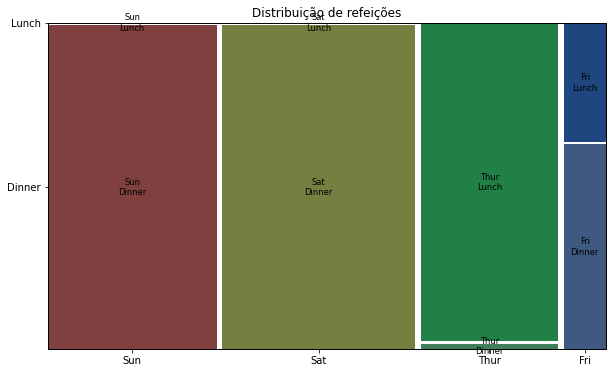

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(1, 1, figsize=figsize)


_=mosaic(tips.loc[:,['day','time']], index =['day','time'], ax=ax, statistic=False, gap=0.01, title='Distribuição de refeições')


# EXERCÍCIO: Mosaico

Para tips, cruzar day e smoker

# Histogramas

O histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes ou intervalos uniformes ou não uniformes. A base de cada retângulo representa uma classe ou intervalo de valores. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ou intervalo ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


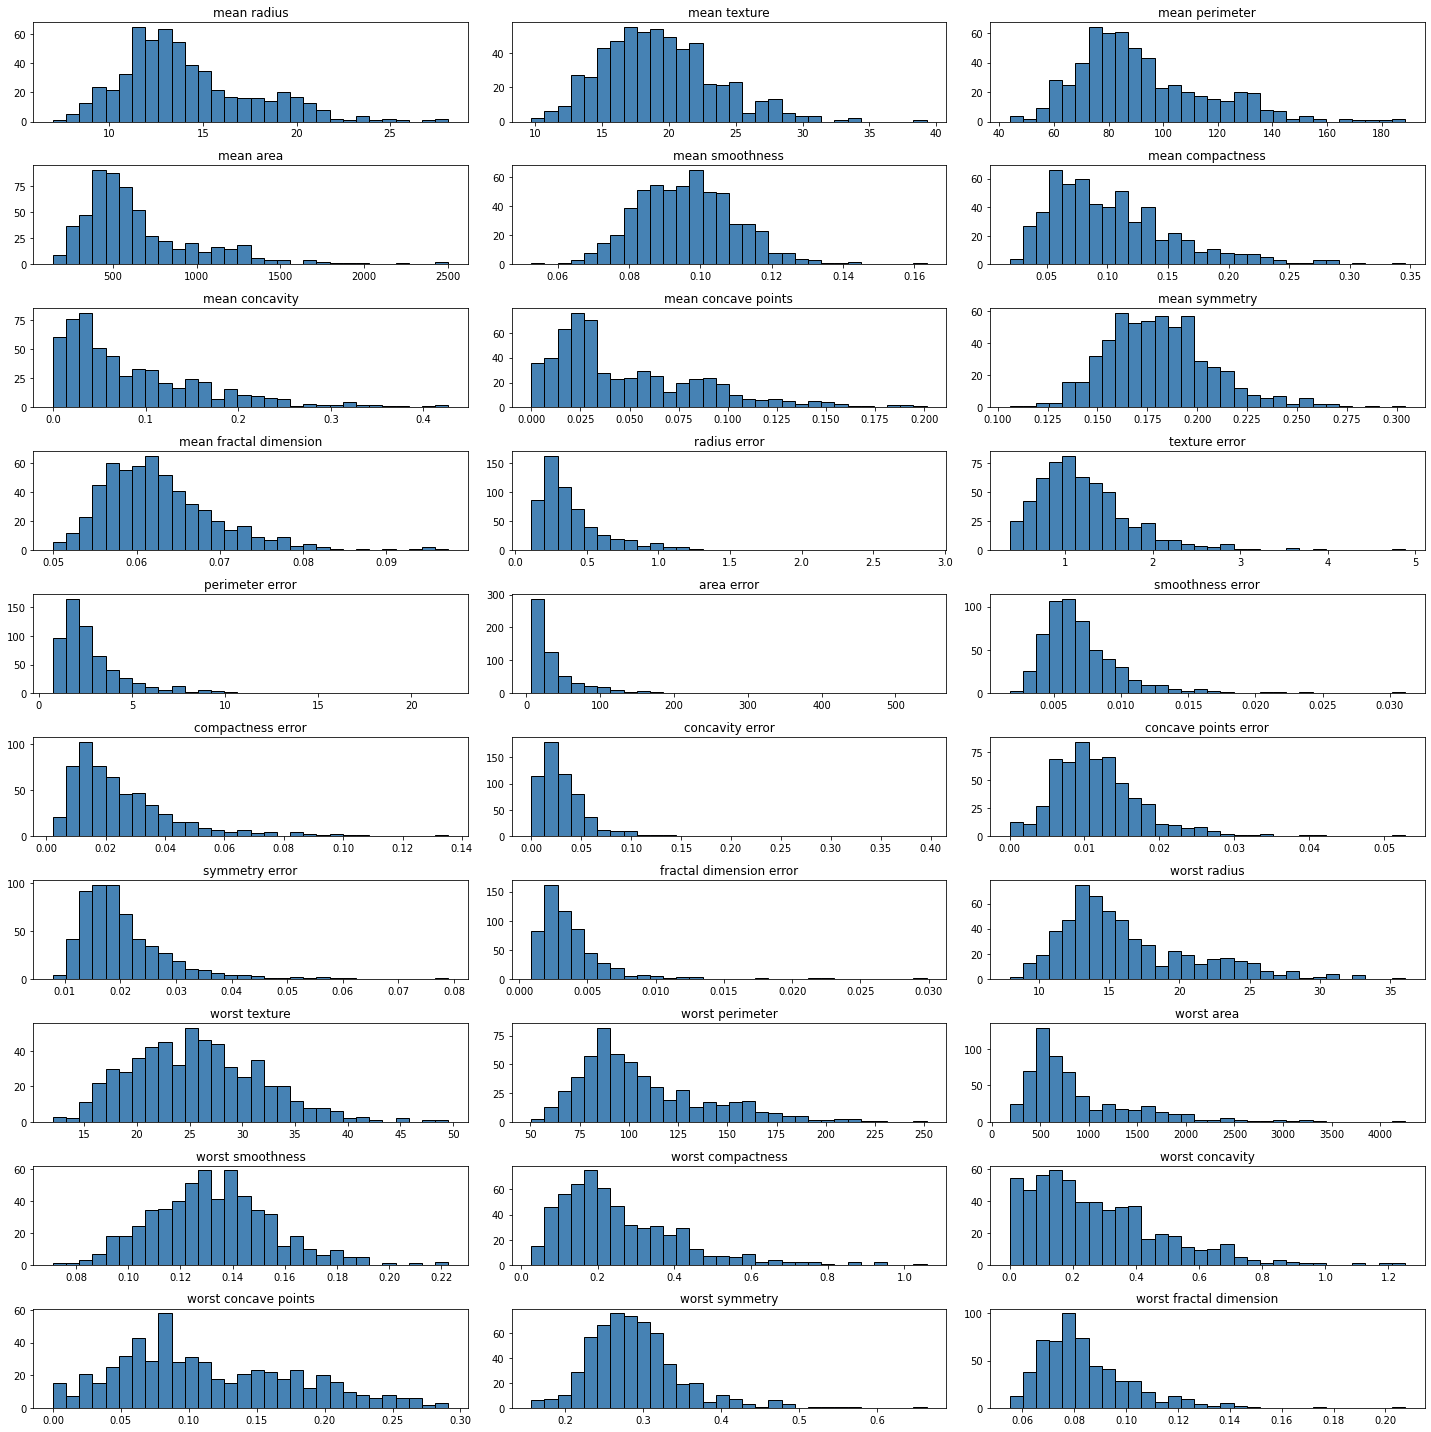

In [ ]:
# Histograma dos dados no pandas

fig, ax = plt.subplots(1, 1, figsize=(20,20))

cancer_data_DF.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False, ax=ax,layout = (10,3) )
plt.tight_layout()

## Histograma comparando dados de entrada com objetivo

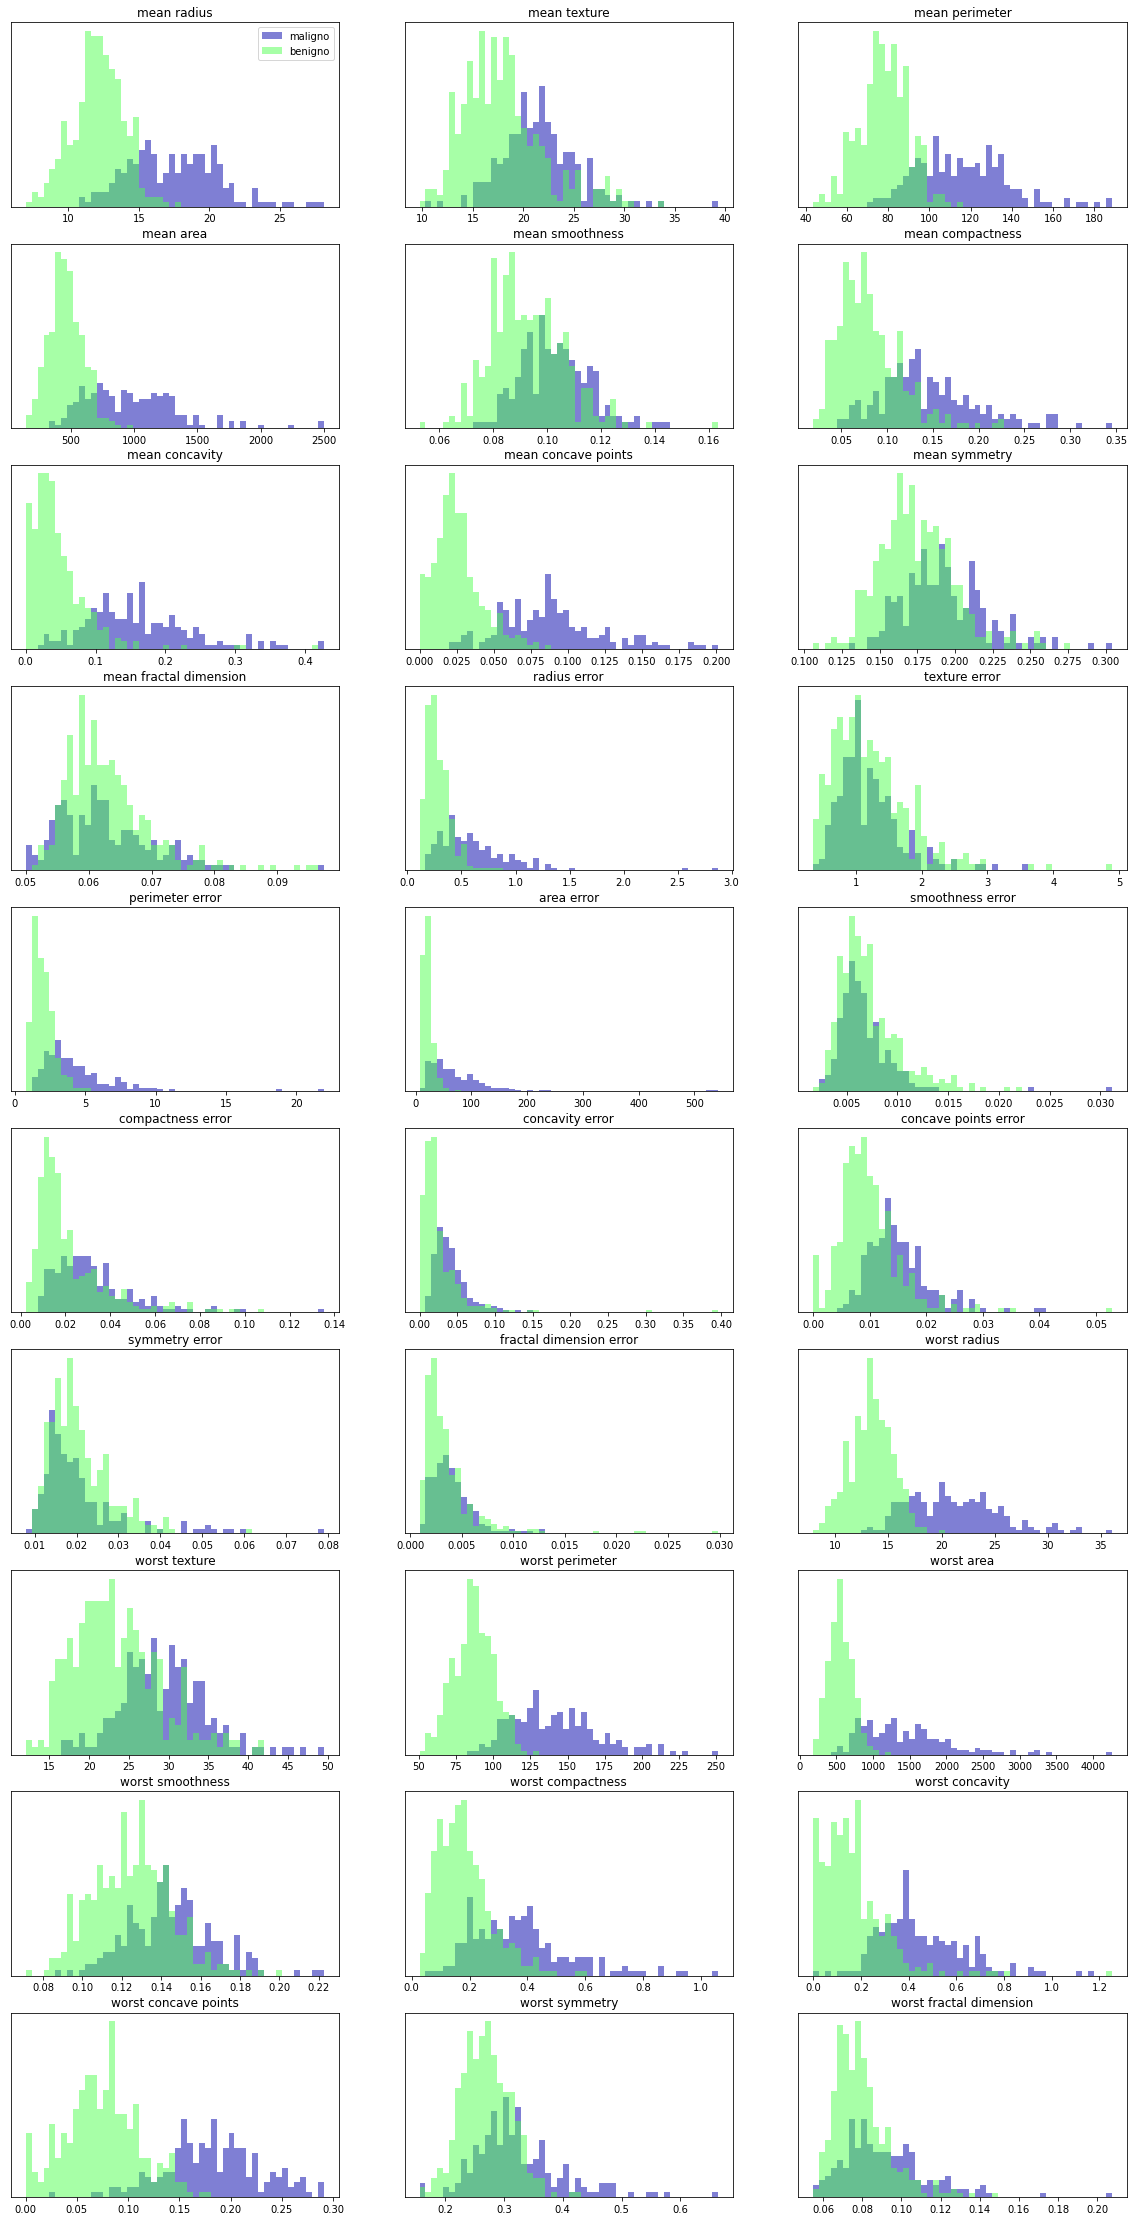

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(20,40))
mal = cancer_target_names[cancer_target_DF.target]== 'malignant'
maligno = cancer_data_DF.loc[mal]
benigno = cancer_data_DF.loc[np.logical_not(mal)]
ax = axes.ravel()
for i in range(len(cancer_data_DF.columns)):
  _, bins = np.histogram(cancer_data_DF[[cancer_data_DF.columns[i]]], bins=50)
  ax[i].hist(maligno[[cancer_data_DF.columns[i]]].values, bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benigno[[cancer_data_DF.columns[i]]].values, bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer_data_DF.columns[i],size = 12)
  ax[i].set_yticks(())
ax[0].legend(["maligno", "benigno"], loc="best")



## Histogramas de treinamento e teste

Quando recebemos bases de treinamento e teste já prontas (ex. competições Kaggle) ou quando montamos nossas bases, é importante verificar se pertencem a mesma distribuição


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer_data_DF, cancer_target_DF, test_size=0.3, random_state=random_state,shuffle =True)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

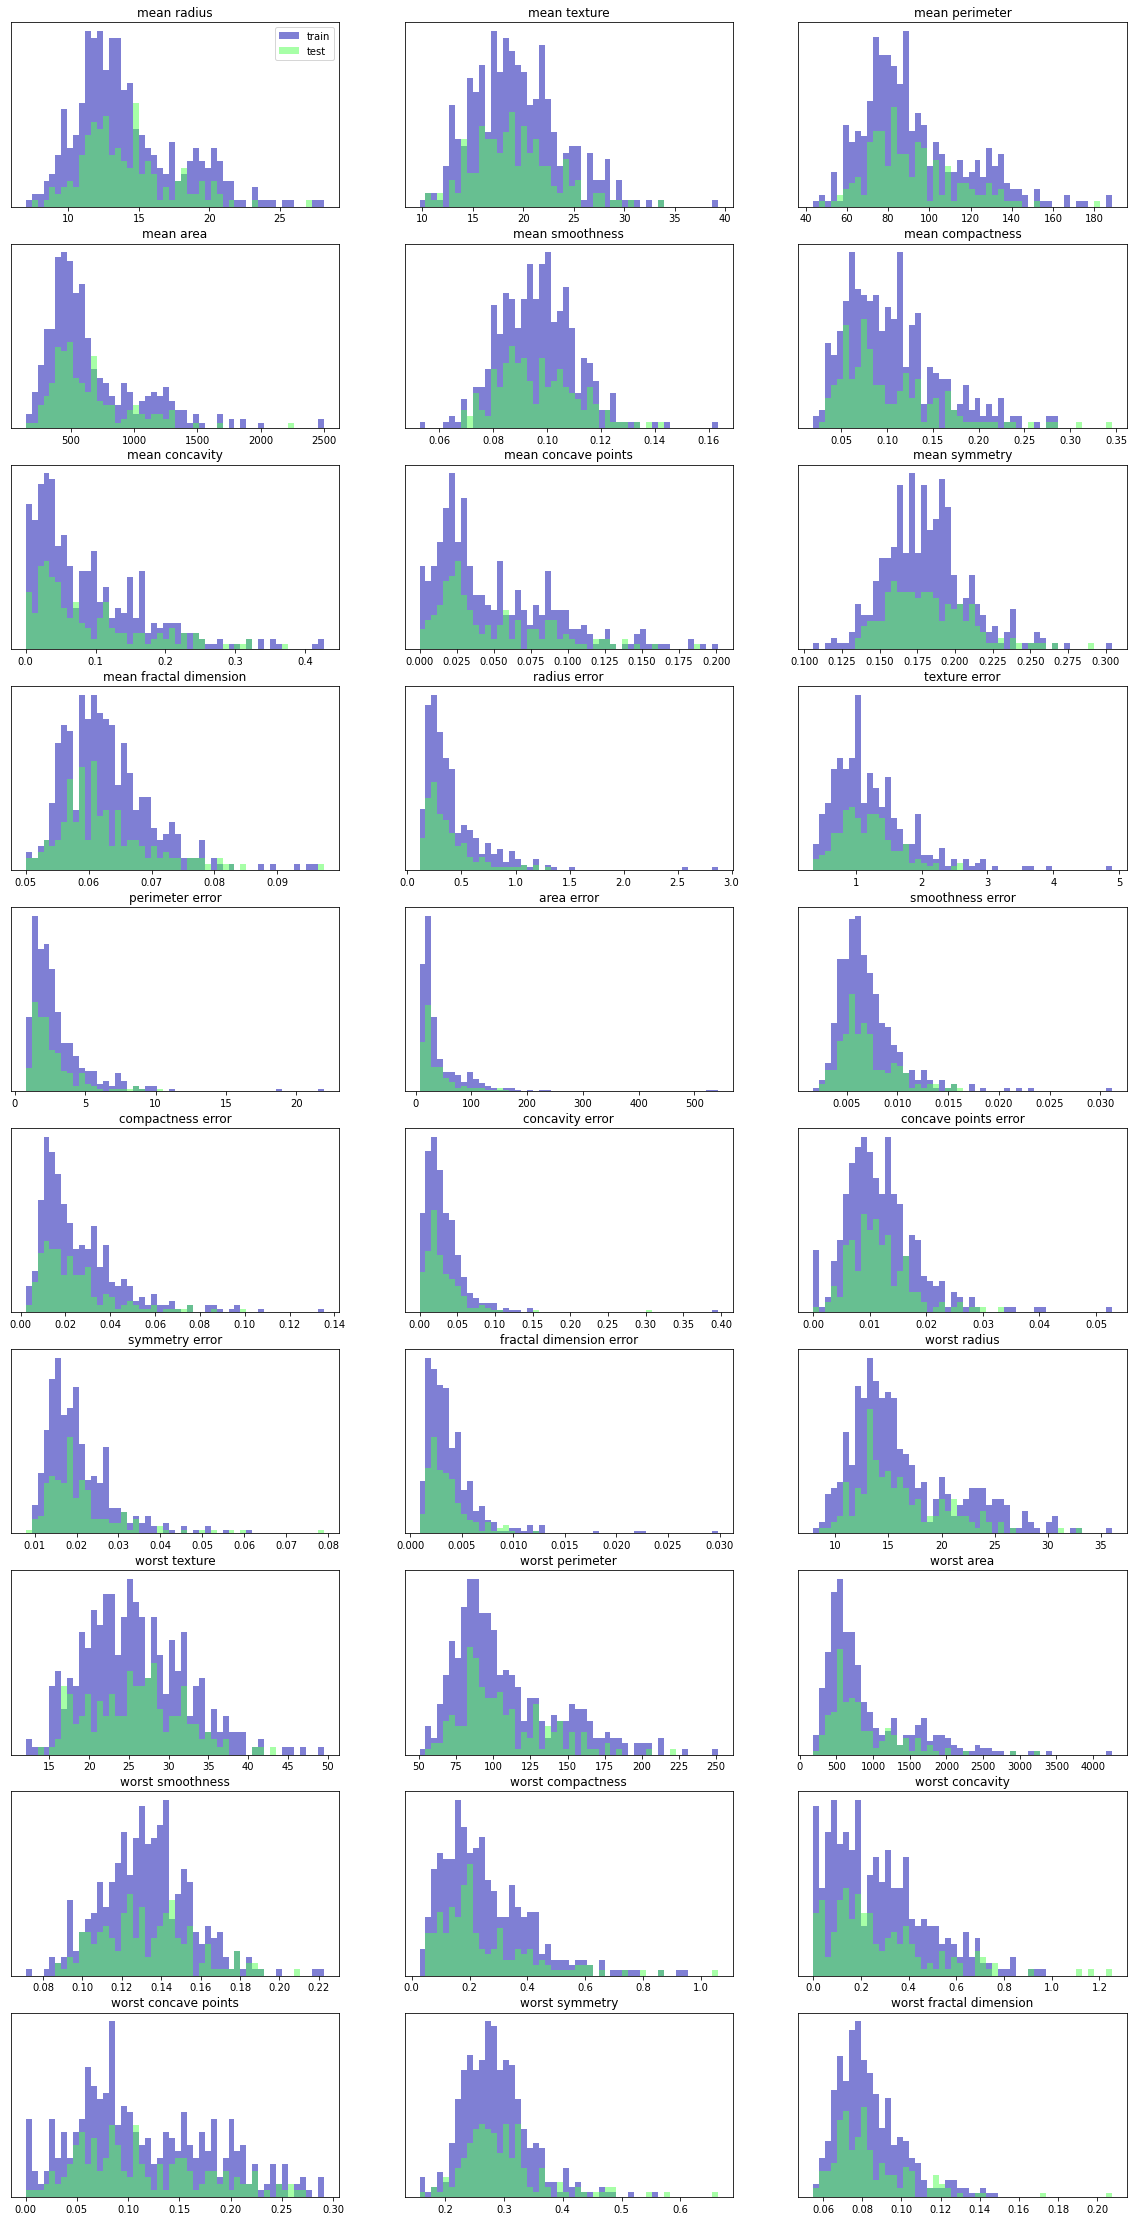

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(20,40))
ax = axes.ravel()
for i in range(len(cancer_data_DF.columns)):
  _, bins = np.histogram(cancer_data_DF[[cancer_data_DF.columns[i]]], bins=50)
  ax[i].hist(x_train[[cancer_data_DF.columns[i]]].values, bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(x_test[[cancer_data_DF.columns[i]]].values, bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer_data_DF.columns[i],size = 12)
  ax[i].set_yticks(())
ax[0].legend(["train", "test"], loc="best")

# EXERCÍCIO: Histogramas

Para tips realizar as seguintes análises:
- Histograma dos dados
- histograma das variáveis tip e total_bill separando cada gráfico em dois histogramas (masculino e feminino)


## BoxPlot


O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.

As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.

Observe a figura do boxplot. Note que o local onde a haste vertical começa (de baixo para cima) indica o mínimo (excetuando algum possível valor extremo ou outlier) e, onde a haste termina indica o máximo (também excetuando algum possível outlier).

![](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png?resize=1024%2C664)

O retângulo no meio dessa haste possui três linhas horizontais: a linha de baixo, que é o próprio contorno externo inferior do retângulo, indica o primeiro quartil. A de cima, que também é o próprio contorno externo superior do retângulo, indica o terceiro quartil. A linha interna indica o segundo quartil ou mediana.

Os asteriscos ou pontos que ás vezes aparecem no boxplot indicam que aquelas observações são atípicas, valores discrepantes, extremos ou outliers.

## Como interpretar o boxplot?

O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados.

- Posição – Em relação à posição dos dados, observa-se a linha central do retângulo (a mediana ou segundo quartil).

- Dispersão – A dispersão dos dados pode ser representada pelo intervalo interquatilico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interqualitico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.

-Simetria – Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.

- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição.

- Outliers – Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de outliers.

O limite de detecção de outliers é construído utilizando o intervalo interquartílico, dado pela distância entre o primeiro e o terceiro quartil. Sendo assim, os limites inferior e superior de detecção de outlier são dados por:

Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

(fonte: https://operdata.com.br/blog/como-interpretar-um-boxplot/#:~:text=O%20boxplot%20nos%20fornece%20uma,a%20mediana%20ou%20segundo%20quartil).

### Comparando a distribuição de um mesmo atributo em diferentes classes

In [ ]:
completo = cancer_data_DF.join(pd.DataFrame(cancer_target_names[cancer_target_DF],columns =['diagnostico']))

In [ ]:
completo.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension diagnostico  
0                  0.11890   malignant  
1                  0.08902   malignant  
2                  0.08758   malignant  
3                  0.17300   malignant  
4                  0.07678   malignant

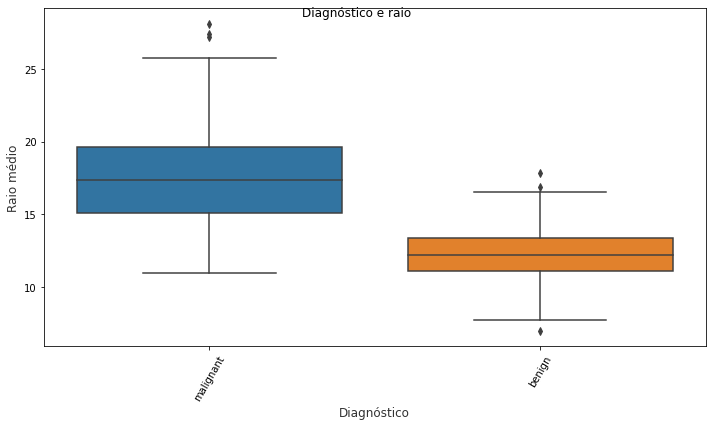

In [ ]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Diagnóstico e raio')

sns.boxplot(x="diagnostico", y="mean radius", data=completo,  ax=ax)
ax.set_xlabel("Diagnóstico",size = 12,alpha=0.8)
ax.set_ylabel("Raio médio",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

### Comparando diferentes atributos


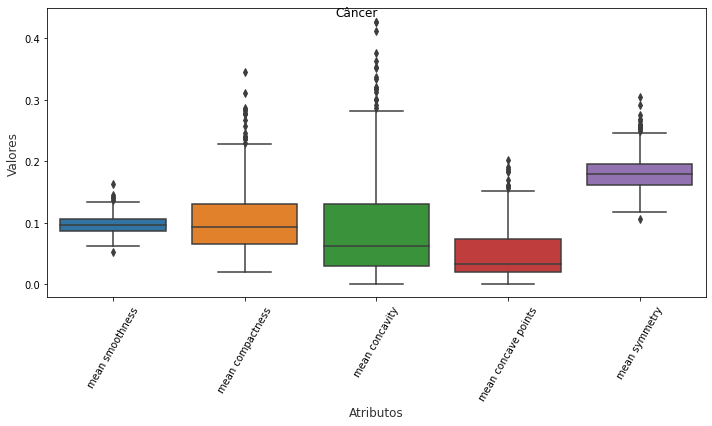

In [ ]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Câncer')

sns.boxplot(data=cancer_data_DF[['mean smoothness',	'mean compactness',	'mean concavity','mean concave points','mean symmetry']],  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

Note que essa comparação fica prejudicada entre variáveis com escalas muito diferentes.

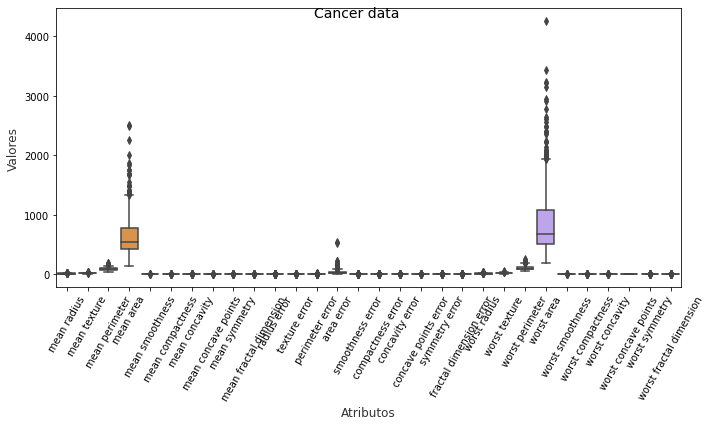

In [ ]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Cancer data', fontsize=14)

sns.boxplot(data=cancer_data_DF,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

#  EXERCÍCIO: Boxplot

Para tips realizar as seguintes análises:
- Boxplot dos dados
- No caso de tips, boxplot de tip agrupado por time, sex e smoker


## Correlações

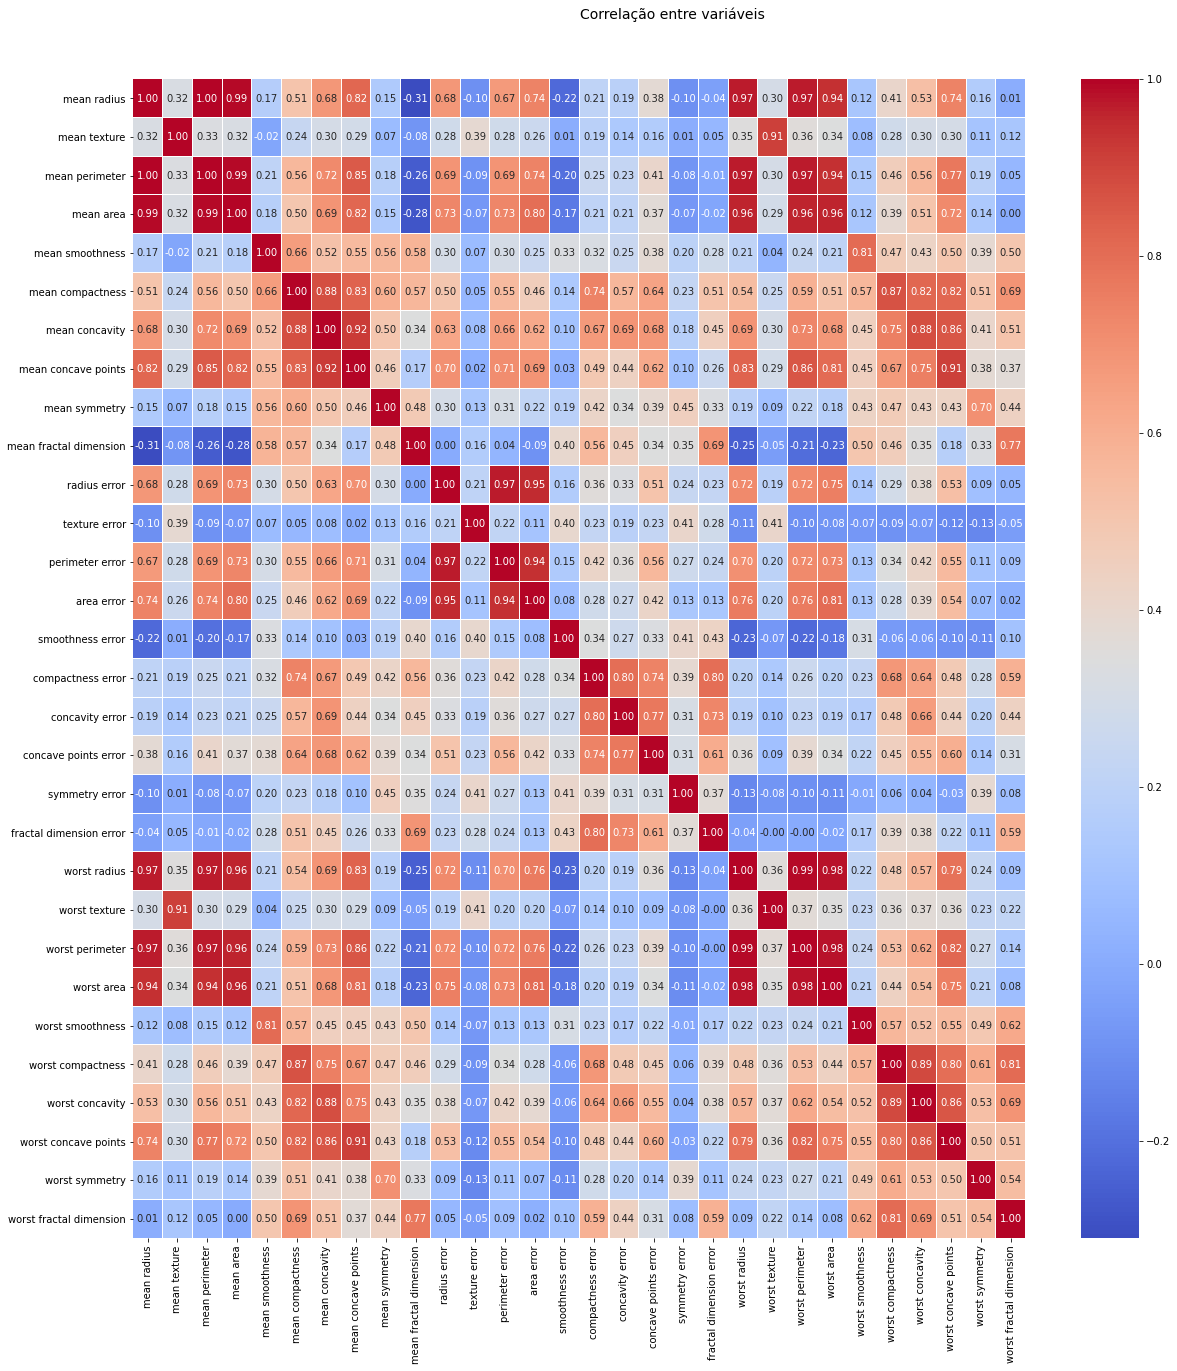

In [ ]:
# Correlação entre dados

f, ax = plt.subplots(figsize=(20,20))
corr = cancer_data_DF.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


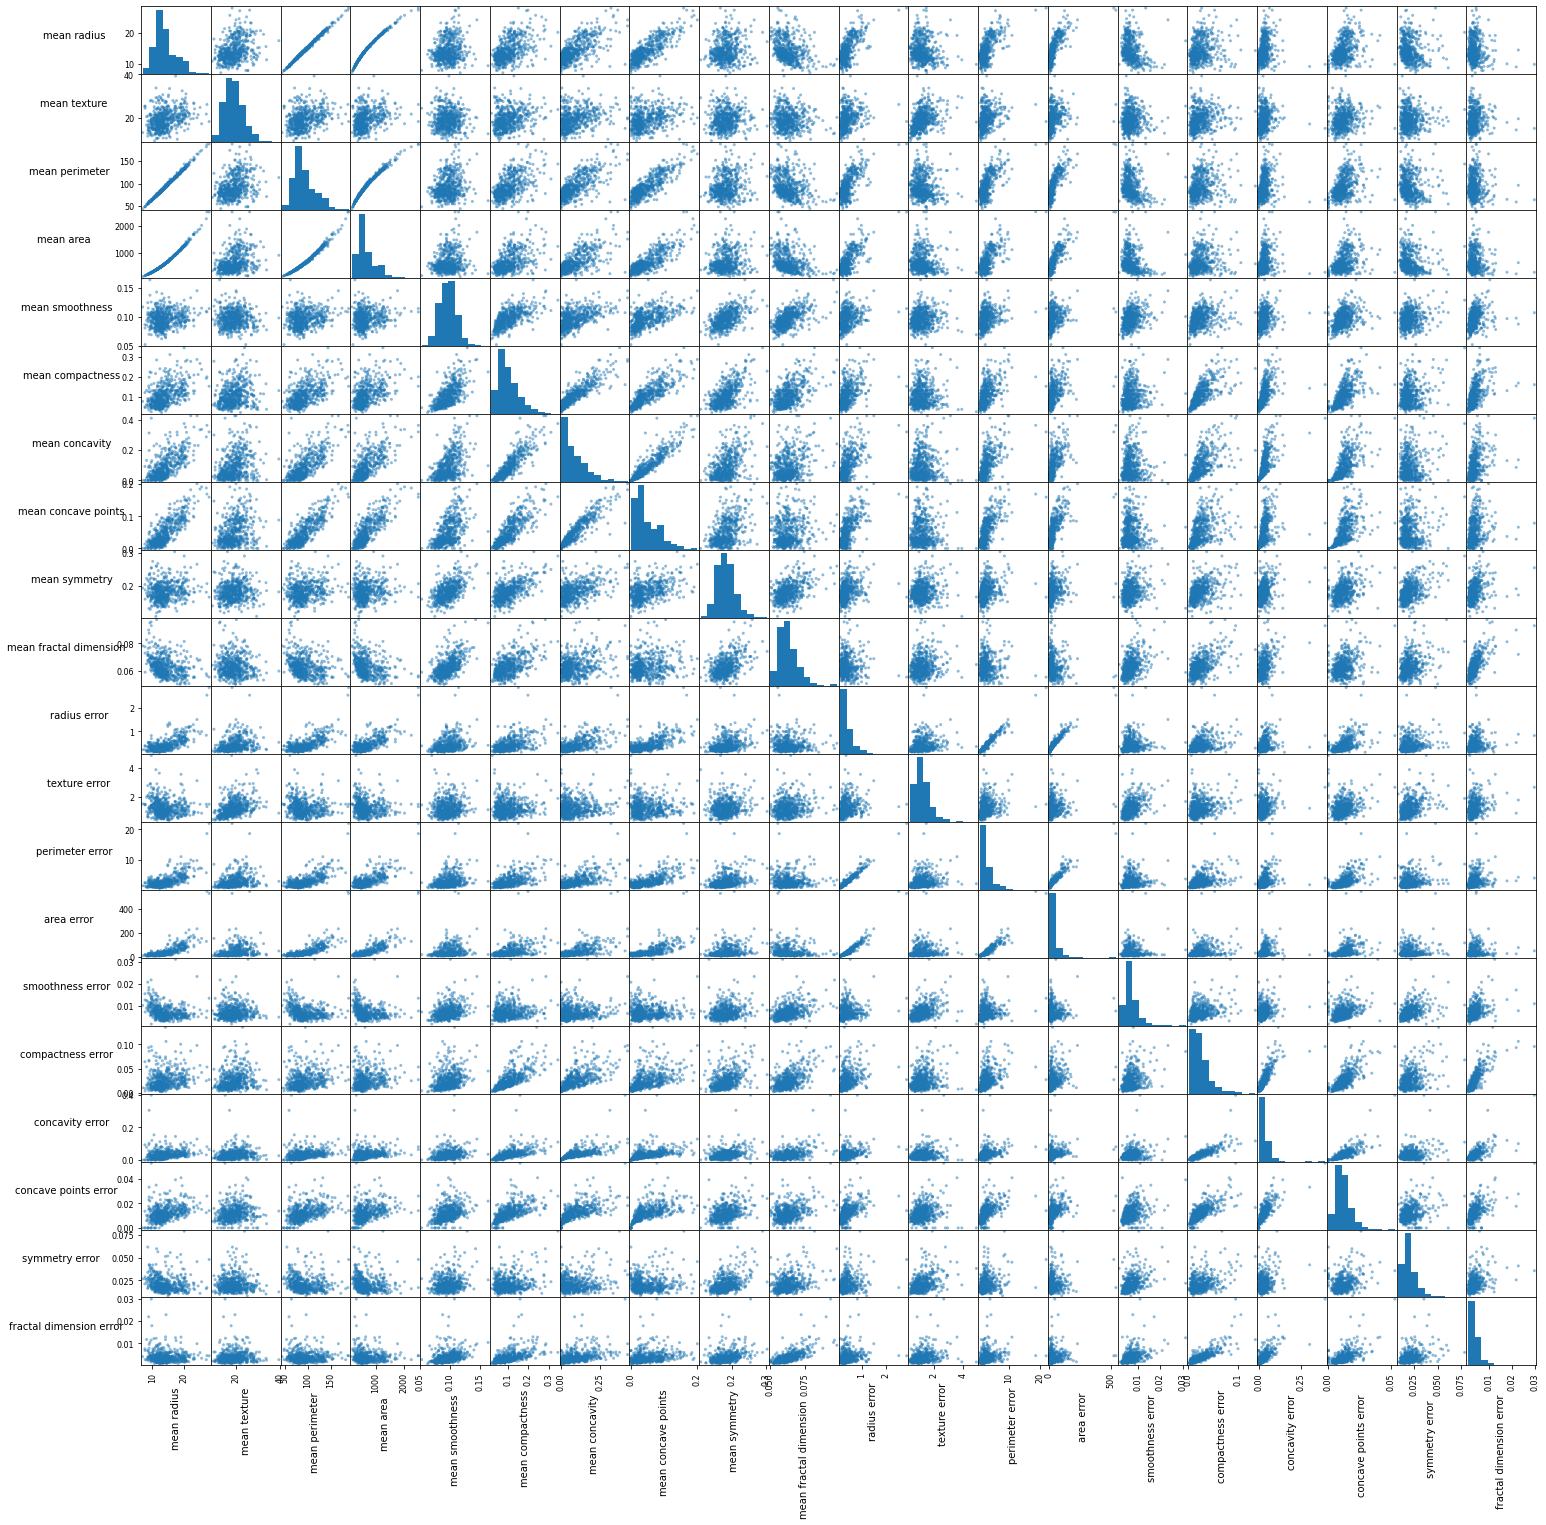

In [ ]:
f, ax = plt.subplots(figsize=(25,25))
axs = pd.plotting.scatter_matrix(cancer_data_DF[[c for c in cancer_data_DF.columns[:20]]], ax=ax)
for x in range(20):
    for y in range(20):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


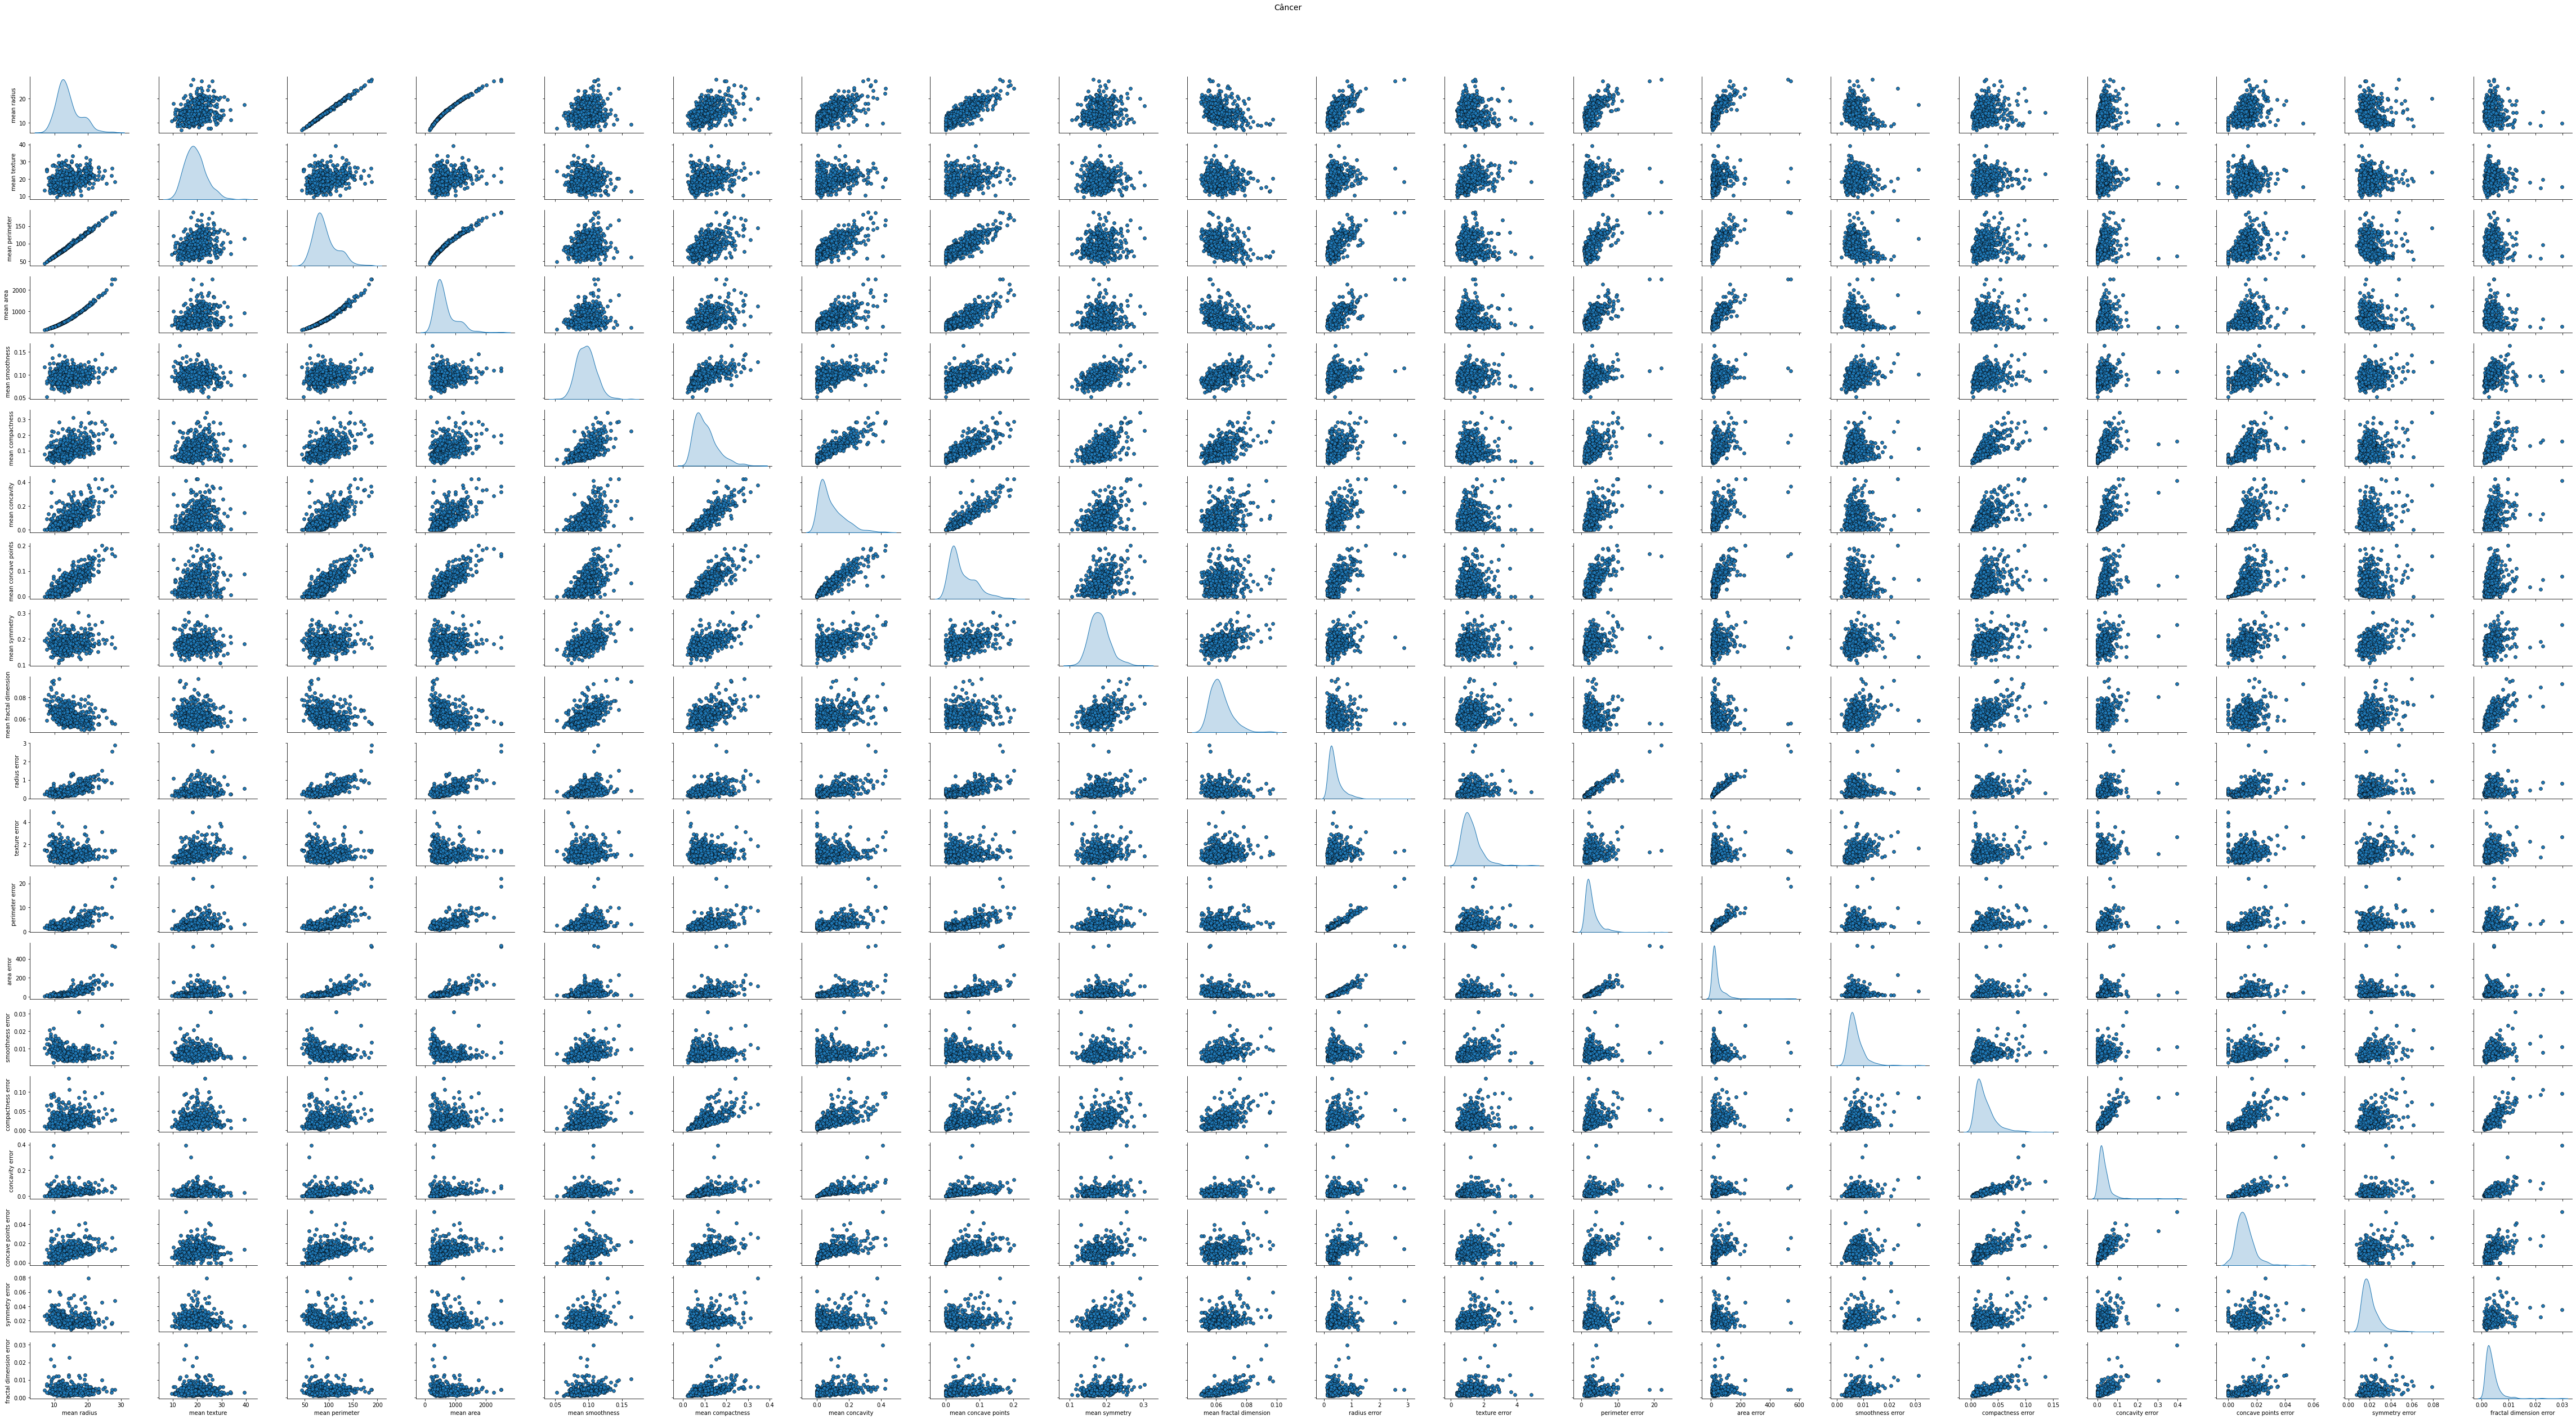

In [ ]:
# Correlação entre dados

pp = sns.pairplot(cancer_data_DF[[c for c in cancer_data_DF.columns[:10]]], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Câncer', fontsize=14)

# EXERCÍCIO: Correlações

Para tips mostra as correlações (heatmap) entre dados numéricos.


## Coordenadas paralelas

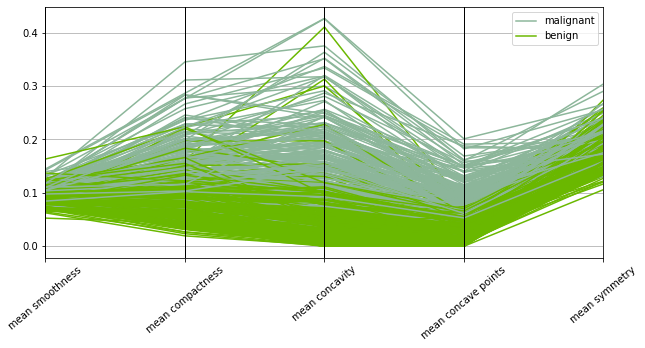

In [ ]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(1, 1, figsize=figsize)

parallel_coordinates(frame=completo, class_column='diagnostico'
                     , ax = ax, cols=['mean smoothness',	'mean compactness',	'mean concavity','mean concave points','mean symmetry'])
plt.xticks(rotation=40)
plt.subplots_adjust(bottom=0.30)

# EXERCÍCIO: Coordenadas paralelas

Para tips criar um  gráfico de coordenadas paralelas (class_column = day)

## Visão 3D dos dados

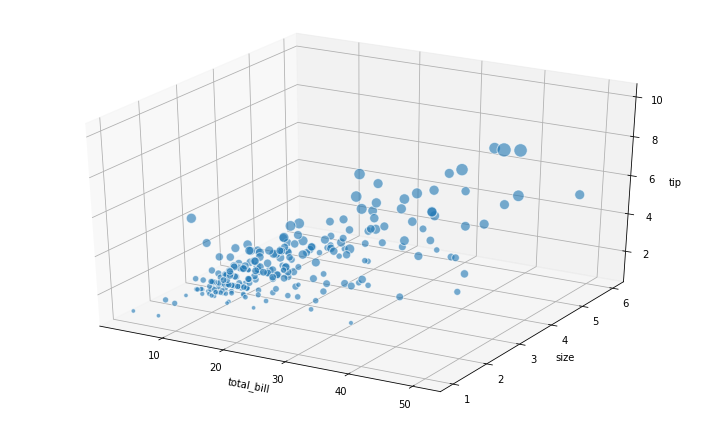

In [ ]:
# Visão 3D dos dados

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

xs = tips['total_bill']
ys = tips['size']
zs = tips['tip']
ax.scatter(xs, ys, zs, s=tips['tip']*20, alpha=0.6, edgecolors='w')

ax.set_xlabel('total_bill')
ax.set_ylabel('size')
ax.set_zlabel('tip')
plt.tight_layout()